# Project 2: Ames Housing Sale Price Prediction
   ---
  *By Ethan Koh, 4 May 2020*

## Overview and Problem Set

The property market is not for the ill-informed. Housing prices can be cruelly volatile as they can get affected by multiple factors. Every buyer and seller of a house seek to equip with better knowledge to achieve a reasonable transaction price. Even though it's not possible for every contributing factor to be captured by our dataset, given the housing dataset in Ames, we are going to create a __regression model to predict the sale price of houses in Ames, Iowa__ based on historical sale prices. In addition, we will be able to __discover what are the main factors contributing to the price and provide recommendations to both buyers and sellers in Ames__. A seller will be keen in knowing what main factors to boost the selling price in order to make improvements to sell at a high price. Meanwhile, a buyer is restricted by limited resource, money. Hence, a buyer will be keen to know what are the main factors that drives up the sale price which may influence their decision on whether they want to proceed buying the house of their dream or for investment purpose. 

## Datasets

These datasets are provided by General Assembly for our course Kaggle competition. The dataset was prepared by Dean De Cock taken from the Ames, Iowa Assessor’s Office, originally used for tax assessment purpose. Data set contains information used in computing assessed values for individual residential properties sold in Ames, Iowa from 2006 to 2010.

The data by Dean De Cook has 2051 observations and 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables, and 2 additional observation identifiers. However, data given by General Assembly has 81 columns, with 'Sale Condition' variable excluded, which include 22 nominal, 23 ordinal, 14 discrete, and 20 continuous variables, and 2 additional observation identifiers.

- train.csv <br /> 
- test.csv <br />


## Data Dictionary

[LINK](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Assumptions and Limitations
Using multi-linear regression has it's own assumptions:<br />
Firstly, the predictors and target variable have an approximate linear relationship.<br />
Secondly, residuals are independent of each other, following a Normal distribution with mean 0 and have roughly equal variances.<br />
Thirdly, the predictors are independent of each other.<br />

In addition, there are limitations to predict future prices based on a 2006-2010 old dataset that we have. Many of the predictors for sale price may no longer be significant/relevant. Example, neighbouhood or street may have expanded.

## Table of Contents
- Import Libraries<br /> 
- Load Dataset<br />
- Data Cleaning: Missing Data <br /> <ul>
- Left 6 predictors with missing values
- Missing values actions to take 
- Filling missing values</ul>
- Exploratory Data Analysis<br /> <ul>
- Datatypes Correction
- Remove outliers
- Correlation
- Feature Selection</ul>
- Feature Engineering: Interaction terms
- Drop columns
- Data Conversion: String to integer
- Final Feature Selection
- Convert Categories to Integers via get_dummies
- Model Prep
- Select Hyperparameters<ul>
- Lasso Regression
- Ridge Regression</ul>
- Baseline model
- Model Selection, Fitting and Evaluation
- Kaggle Submission
- Conclusion and Recommendations

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

%matplotlib inline

## Load Dataset

In [2]:
# There are 12 features(columns) with NA as a value with meaning
# Hence during import set defaul na as False

# Train dataset given
housing = pd.read_csv("../datasets/train.csv",keep_default_na=False)
# Test dataset given
housing_test = pd.read_csv("../datasets/test.csv",keep_default_na=False)

## Data Cleaning: Missing Data

In [3]:
#set option to view all columns
pd.set_option('display.max_columns', 250)
housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [4]:
# check data shape
print(housing.shape)
housing_test.shape

(2051, 81)


(879, 80)

In [5]:
# replace real missing data with NaN
housing.replace('', np.nan,inplace=True)
housing_test.replace('', np.nan,inplace=True)

In [6]:
# check for nulls for train set
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual           1
Bsmt Cond           1
Bsmt Exposure       4
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin Type 2      2
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
dtype: int64

In [7]:
# check for nulls for test set
housing_test.isnull().sum()[housing_test.isnull().sum()>0]

Lot Frontage     160
Mas Vnr Type       1
Mas Vnr Area       1
Electrical         1
Garage Yr Blt     45
Garage Finish      1
dtype: int64

In [8]:
### Deal with training set
# drop one of the identifier variable. no need to have 2 index
housing.drop('PID',axis=1,inplace=True)
print(housing.shape)
housing_test.drop('PID',axis=1,inplace=True)
housing_test.shape

(2051, 80)


(879, 79)

In [9]:
# random check whether it is the same null value in some of the predictors
housing[housing['BsmtFin SF 1'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,20,RM,99,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [10]:
housing[housing['Total Bsmt SF'].isnull()]
# it is the same ID having many nulls. id=1342. probably is completely missing at random. 

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,20,RM,99,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [11]:
# remove index=1327 for train set
housing.drop(1327,inplace=True)

In [12]:
# check for nulls again for train set
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       3
BsmtFin Type 2      1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
dtype: int64

In [13]:
# for train set
# random check whether it is the same null value in some of the predictors
housing[housing['Garage Cond'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,70,RM,50,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,BrkTil,Gd,TA,No,ALQ,548,Unf,0,311,859,GasA,Ex,Y,SBrkr,942,886,0,1828,0,0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [14]:
housing[housing['Garage Qual'].isnull()]
# it is the same ID having many nulls. index=1712. probably is missing completely at random (MCAR). 

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,70,RM,50,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,BrkTil,Gd,TA,No,ALQ,548,Unf,0,311,859,GasA,Ex,Y,SBrkr,942,886,0,1828,0,0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [15]:
# remove index=1712 for train set
housing.drop(1712,inplace=True)

In [16]:
# check for nulls again for train set
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       3
BsmtFin Type 2      1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Yr Blt     113
dtype: int64

In [17]:
# check shape
housing.shape

(2049, 80)

In [18]:
# just drop those with small missing values seems most likely is completely missing at random
housing.dropna(subset=['Bsmt Exposure','BsmtFin Type 2','Bsmt Full Bath','Bsmt Half Bath'],inplace=True)

In [19]:
# check shape
housing.shape
# 5 rows dropped

(2044, 80)

In [20]:
# check for nulls again for train set
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage     330
Mas Vnr Type      22
Mas Vnr Area      22
Garage Yr Blt    113
dtype: int64

In [21]:
# remind us for nulls for test set
housing_test.isnull().sum()[housing_test.isnull().sum()>0]\
# for kaggle submission, the number of rows required for test set is fixed
# instead of dropping the number of rows, will impute the missing values later

Lot Frontage     160
Mas Vnr Type       1
Mas Vnr Area       1
Electrical         1
Garage Yr Blt     45
Garage Finish      1
dtype: int64

### Left 6 predictors with missing values
For train set, there are 4 predictors with missing values.<br/>
For test set, there are 6 predictors with missing values.<br/>
Let's investigate further

In [22]:
# temporary drop the nulls
housing_temp = housing.dropna()
# create a temporary dataframe 
housing_temp.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500
5,138,20,RL,137,16492,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0,Gd,TA,CBlock,TA,TA,No,ALQ,247,Rec,713,557,1517,GasA,Ex,Y,SBrkr,1888,0,0,1888,0,0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966,Fin,2,578,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2010,WD,190000


In [23]:
# correct the datatype in order to plot the graph later
housing_temp.loc[:,'Lot Frontage'] = housing_temp['Lot Frontage'].astype(int)
housing_temp.loc[:,'Mas Vnr Area'] = housing_temp['Mas Vnr Area'].astype(int)
housing_temp.loc[:,'Garage Yr Blt'] = housing_temp['Garage Yr Blt'].astype(int)
housing_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 1 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               1592 non-null   int64 
 1   MS SubClass      1592 non-null   int64 
 2   MS Zoning        1592 non-null   object
 3   Lot Frontage     1592 non-null   int64 
 4   Lot Area         1592 non-null   int64 
 5   Street           1592 non-null   object
 6   Alley            1592 non-null   object
 7   Lot Shape        1592 non-null   object
 8   Land Contour     1592 non-null   object
 9   Utilities        1592 non-null   object
 10  Lot Config       1592 non-null   object
 11  Land Slope       1592 non-null   object
 12  Neighborhood     1592 non-null   object
 13  Condition 1      1592 non-null   object
 14  Condition 2      1592 non-null   object
 15  Bldg Type        1592 non-null   object
 16  House Style      1592 non-null   object
 17  Overall Qual     1592 non-null   

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


_Lot Frontage_

In [24]:
# for train set
housing[housing['Lot Frontage'].isnull()]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
7,145,20,RL,NaN,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180,TA,TA,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,Fa,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959,RFn,2,531,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
8,1942,20,RL,NaN,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,CBlock,TA,TA,No,Rec,292,Unf,0,632,924,GasA,TA,Y,SBrkr,924,0,0,924,0,0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952,Unf,1,420,TA,TA,Y,0,324,0,0,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500
23,12,20,RL,NaN,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,185000
27,1534,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0,TA,TA,CBlock,TA,TA,No,BLQ,606,Unf,0,336,942,GasA,Ex,Y,SBrkr,1265,673,0,1938,0,0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937,Unf,1,240,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,20,RL,NaN,7791,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,None,0,Gd,Gd,CBlock,TA,TA,No,ALQ,624,Unf,0,288,912,GasA,Ex,Y,SBrkr,912,0,0,912,1,0,1,0,3,1,Gd,6,Typ,0,NA,Attchd,1963,RFn,1,300,TA,TA,Y,0,0,0,0,0,0,NA,GdWo,NA,0,10,2009,WD,129000
2022,2872,20,RL,NaN,16381,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,312,Gd,Gd,CBlock,TA,TA,Av,Rec,1110,Unf,0,734,1844,GasA,Gd,Y,SBrkr,1844,0,0,1844,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1969,RFn,2,540,TA,TA,Y,0,73,216,0,0,0,NA,NA,NA,0,12,2006,WD,223000
2028,2526,20,RL,NaN,20781,Pave,NA,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,None,0,TA,TA,CBlock,TA,TA,No,BLQ,297,Rec,68,1203,1568,GasA,TA,Y,SBrkr,2156,0,0,2156,0,0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968,RFn,2,508,Gd,TA,Y,0,80,0,290,0,0,NA,NA,NA,0,6,2006,WD,262500
2031,25,20,RL,NaN,12537,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1971,2008,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,GLQ,734,Unf,0,344,1078,GasA,Ex,Y,SBrkr,1078,0,0,1078,1,0,1,1,3,1,

In [25]:
# for test set
housing_test[housing_test['Lot Frontage'].isnull()]
# it seems that missing values from Lot Frontage for both train and test set is not due to Lot Area=0.  
# only that specific column have missing values. 
# other columns seems to not have missing values, suggesting not missing at random(NMAR) or missing at random(MAR).
# I believe it's merely due to lack of this information by sellers or buyers instead filled as Null.

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
1,2718,90,RL,NaN,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
4,625,20,RL,NaN,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD
7,858,20,RL,NaN,9286,Pave,NA,IR1,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0,TA,TA,CBlock,Gd,Gd,Av,ALQ,196,Unf,0,1072,1268,GasA,TA,Y,SBrkr,1268,0,0,1268,0,0,1,1,3,1,Gd,5,Typ,0,NA,Detchd,1978,Unf,1,252,TA,TA,Y,173,0,0,0,0,0,NA,NA,NA,0,10,2009,WD
13,818,90,RL,NaN,7976,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23,TA,TA,PConc,Ex,TA,No,GLQ,820,Unf,0,348,1168,GasA,Ex,Y,SBrkr,1168,1619,0,2787,2,0,4,2,6,2,TA,8,Typ,2,TA,BuiltIn,2000,Fin,4,820,TA,TA,Y,312,0,0,0,0,0,NA,NA,NA,0,10,2009,WD
20,222,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NA,MnPrv,NA,0,5,2010,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,2582,90,RL,NaN,7032,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,GLQ,943,Unf,0,0,943,GasA,TA,Y,SBrkr,943,0,0,943,1,0,1,0,2,1,TA,4,Typ,2,TA,Detchd,1979,Unf,2,600,TA,TA,Y,42,0,0,0,0,0,NA,NA,NA,0,12,2006,WD
860,984,20,RL,NaN,8780,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NA,NA,NaN,NA,0,0,NA,NA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,3,2009,WD
867,2271,20,RL,NaN,7777,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,203,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1491,1491,GasA,Ex,Y,SBrkr,1491,0,0,1491,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1996,Fin,2,571,TA,TA,Y,0,35,0,0,0,0,NA,NA,NA,0,11,2007,WD
868,1633,160,RL,NaN,5062,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,828,LwQ,182,180,1190,GasA,Gd,Y,SBrkr,1190,900,0,2090,1,0,2,0,3,1,Gd,6,Min1,1,TA,Attchd,1984,Fin,2,577,TA,TA,Y,219,0,0,0,0,0,NA,NA,NA,0,9,2007,WD


In [26]:
# Explore summary statistics
housing_temp[['Lot Frontage','Mas Vnr Area']].describe()
# For Lot Frontage, the standard deviation is 1/3 of the mean. 75th percentile is low compared to the maximum 313 suggesting there are outliers 
# I think it is reasonable to use the median 69 to replace null values for Lot Frontage

# For Mas Vnr Area, it seems that majority is zero. Shall explore further.

,Lot Frontage,Mas Vnr Area
count,1592.000000,1592.000000
mean,69.474246,102.198492
std,23.263432,179.991576
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,163.250000
max,313.000000,1600.000000


_Mas Vnr Type and Mas Vnr Area_

In [27]:
# for train set
housing[housing['Mas Vnr Type'].isnull()]
# Those missing from Mas Vnr Type also have Mas Vnr Area missing

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,60,RL,103,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1209,1209,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005,Fin,2,575,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,20,RL,107,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,20,RL,67,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,20,FV,90,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1436,1436,GasA,Ex,Y,SBrkr,1436,0,0,1436,0,0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008,Fin,2,529,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,20,RL,75,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475,ALQ,297,142,914,GasA,Ex,Y,SBrkr,914,0,0,914,1,0,1,0,2,1,Gd,4,Typ,0,NA,NA,NaN,NA,0,0,NA,NA,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250
338,1800,60,FV,112,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745,Unf,0,210,955,GasA,Ex,Y,SBrkr,955,925,0,1880,1,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007,Fin,3,880,TA,TA,Y,168,127,0,0,0,0,NA,NA,NA,0,12,2007,New,310013
431,1455,60,RL,75,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,237000
451,1120,20,RL,87,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666,Unf,0,794,1460,GasA,Ex,Y,SBrkr,1460,0,0,1460,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006,Fin,2,480,TA,TA,Y,0,20,0,0,0,0,NA,NA,NA,0,8,2008,WD,247000
591,1841,120,FV,35,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA,0,11,2007,New,199900
844,1840,120,FV,30,5330,Pave,Pave,IR2,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1550,1550,GasA,Ex,Y,SBrkr,1550,0,0,1550,0,0,2,1,2,1,Gd,5,Typ,0,NA,Attchd,2007,Fin,

In [28]:
# for test set 
housing_test[housing_test['Mas Vnr Type'].isnull()]
# Those missing from Mas Vnr Type also have Mas Vnr Area missing

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
866,868,60,RL,70,8749,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,885,0,1725,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,2002,RFn,2,550,TA,TA,Y,0,48,0,0,0,0,NA,NA,NA,0,11,2009,WD


In [29]:
# Look at proportion in Mas Vnr Type
housing_temp['Mas Vnr Type'].value_counts()
# Mostly is 'None'. Suggest filling the 22 values with 'None' since it's not a lot of missing values.
# Mas Vnr Area will be filled as 0 accordingly.

None       955
BrkFace    473
Stone      156
BrkCmn       8
Name: Mas Vnr Type, dtype: int64

_Electrical_

In [30]:
# to observe from train set
housing['Electrical'].value_counts(normalize=True)

SBrkr    0.910959
FuseA    0.068004
FuseF    0.017123
FuseP    0.003425
Mix      0.000489
Name: Electrical, dtype: float64

In [31]:
# and from test set
housing_test['Electrical'].value_counts(normalize=True)
# since majority SBrkr, for just 1 NA will put as SBrkr

SBrkr    0.927107
FuseA    0.054670
FuseF    0.017084
FuseP    0.001139
Name: Electrical, dtype: float64

_Garage Finish_

In [32]:
# for test set
housing_test[housing_test['Garage Finish'].isnull()]
# for Garage Finish missing, the Garage Yr Blt is also missing even though Garage Type is not NA. 

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
765,1357,60,RM,57,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NA,Detchd,NaN,NaN,1,360,NA,NA,Y,64,0,180,0,0,0,NA,MnPrv,Shed,1000,9,2008,WD


In [33]:
# for train set
housing['Garage Finish'].value_counts(normalize=True)
# since majority is Unf, for just 1 missing value for test set will put as Unf which represents unfinished

Unf    0.413894
RFn    0.281800
Fin    0.249022
NA     0.055284
Name: Garage Finish, dtype: float64

_Garage Yr Blt_

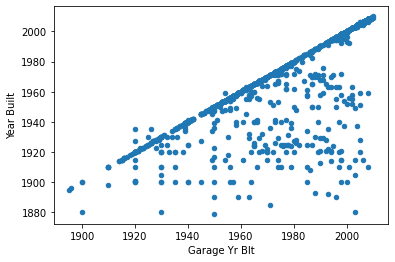

In [34]:
housing_temp.plot(kind='scatter',x='Garage Yr Blt',y='Year Built');
# Seems like Garage Yr Blt not really same as Year Built. A lot values not along linear relationship.
# Can't really impute with it.

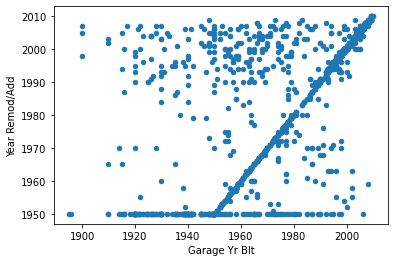

In [35]:
housing_temp.plot(kind='scatter',x='Garage Yr Blt',y='Year Remod/Add');
# Seems like Garage Yr Blt also not really same as Year Remod/Add. A lot values not along linear relationship.
# Can't really impute with it.

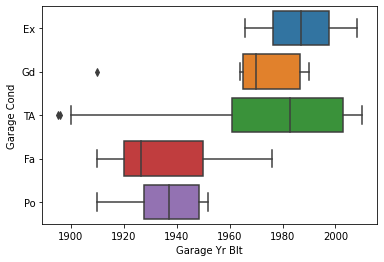

In [36]:
sns.boxplot('Garage Yr Blt','Garage Cond',order=['Ex','Gd','TA','Fa','Po'],data=housing_temp);
# can be seen Garage Cond with Ex or Gd tend to be newer built after 1960s compared to Fa and Po condition.

### Missing values actions to take
- 'Mas Vnr Type': Filling the 22 missing values as 'None'.
- 'Mas Vnr Area': Since those missing at Mas Vnr Area is same as Mas Vnr Type, so will fill those as 0.
- 'Lot Frontage': Fill the 330 missing values with median value 69.
- 'Garage Yr Blt': Filling the missing year with the median year according to the Garage Cond.
- 'Garage Finish' (for test set): Fill missing value with Unf
- 'Eletrical' (for test set): Fill missing value with SBrkr

## Filling missing values

In [37]:
housing['Mas Vnr Type'].fillna('None', inplace=True)
housing_test['Mas Vnr Type'].fillna('None', inplace=True)

In [38]:
housing['Mas Vnr Area'].fillna(0, inplace=True)
housing_test['Mas Vnr Area'].fillna(0, inplace=True)

In [39]:
housing['Lot Frontage'].fillna(69, inplace=True)
housing_test['Lot Frontage'].fillna(69, inplace=True)

In [40]:
housing['Garage Yr Blt'].fillna(1978, inplace=True)
housing_test['Garage Yr Blt'].fillna(1978, inplace=True)

housing_temp.groupby('Garage Cond')['Garage Yr Blt'].mean()[4]

housing_temp.groupby('Garage Cond')['Garage Yr Blt'].mean()

def rep_null(series):
    new_series=[]
    for i,x in enumerate(series):
        if x == "Ex" and x == np.NaN:
            new_series[i] = housing_temp.groupby('Garage Cond')['Garage Yr Blt'].mean()[0]
        elif x == "Fa" and x == np.NaN:
            new_series[i] = housing_temp.groupby('Garage Cond')['Garage Yr Blt'].mean()[1]
        elif x == "Gd" and x == np.NaN:
            new_series[i] = housing_temp.groupby('Garage Cond')['Garage Yr Blt'].mean()[2]
        elif x == "Po" and x == np.NaN:
            new_series[i] = housing_temp.groupby('Garage Cond')['Garage Yr Blt'].mean()[3]
        else:
            new_series[i] = housing_temp.groupby('Garage Cond')['Garage Yr Blt'].mean()[4]
            
    print(new_series)
    return new_series

rep_null(housing['Garage Yr Blt'])

housing[housing['Garage Yr Blt'].isnull()]
# 28 id 2243

housing.loc[28,'Garage Yr Blt']

In [41]:
housing_test['Garage Finish'].fillna('Unf', inplace=True)
housing_test['Electrical'].fillna('SBrkr', inplace=True)

In [42]:
# casual checking
housing_test['Mas Vnr Type'].value_counts()

None       535
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [43]:
housing_test['Electrical'].value_counts()

SBrkr    815
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [44]:
# check for nulls again
print(housing.isnull().sum()[housing.isnull().sum()>0])
housing_test.isnull().sum()[housing_test.isnull().sum()>0]
# no more missing values

Series([], dtype: int64)


Series([], dtype: int64)

In [45]:
# Final number of rows and columns
print(housing.shape)
# 2044 observations, 78 predictors, 1 target, 1 index
print(housing_test.shape)
# 879 observations, 77 predictors, 1 target, 1 index


(2044, 80)
(879, 79)


## Exploratory Data Analysis

### Datatypes Correction

In [46]:
# convert datatype to correct ones
housing['Lot Frontage'] = housing['Lot Frontage'].astype(int)
housing['Mas Vnr Area'] = housing['Mas Vnr Area'].astype(int)
housing['Garage Yr Blt'] = housing['Garage Yr Blt'].astype(int)
housing['MS SubClass'] = housing['MS SubClass'].astype(str)

housing_test['Lot Frontage'] = housing_test['Lot Frontage'].astype(int)
housing_test['Mas Vnr Area'] = housing_test['Mas Vnr Area'].astype(int)
housing_test['Garage Yr Blt'] = housing_test['Garage Yr Blt'].astype(int)
housing_test['MS SubClass'] = housing_test['MS SubClass'].astype(str)

In [47]:
# Look at data to check datatype
housing.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,69,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2044 non-null   int64 
 1   MS SubClass      2044 non-null   object
 2   MS Zoning        2044 non-null   object
 3   Lot Frontage     2044 non-null   int64 
 4   Lot Area         2044 non-null   int64 
 5   Street           2044 non-null   object
 6   Alley            2044 non-null   object
 7   Lot Shape        2044 non-null   object
 8   Land Contour     2044 non-null   object
 9   Utilities        2044 non-null   object
 10  Lot Config       2044 non-null   object
 11  Land Slope       2044 non-null   object
 12  Neighborhood     2044 non-null   object
 13  Condition 1      2044 non-null   object
 14  Condition 2      2044 non-null   object
 15  Bldg Type        2044 non-null   object
 16  House Style      2044 non-null   object
 17  Overall Qual     2044 non-null   

In [49]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               879 non-null    int64 
 1   MS SubClass      879 non-null    object
 2   MS Zoning        879 non-null    object
 3   Lot Frontage     879 non-null    int64 
 4   Lot Area         879 non-null    int64 
 5   Street           879 non-null    object
 6   Alley            879 non-null    object
 7   Lot Shape        879 non-null    object
 8   Land Contour     879 non-null    object
 9   Utilities        879 non-null    object
 10  Lot Config       879 non-null    object
 11  Land Slope       879 non-null    object
 12  Neighborhood     879 non-null    object
 13  Condition 1      879 non-null    object
 14  Condition 2      879 non-null    object
 15  Bldg Type        879 non-null    object
 16  House Style      879 non-null    object
 17  Overall Qual     879 non-null    in

After investigating, the following variables are wrongly classified:
- BsmtFin SF 1
- BsmtFin SF 2
- Bsmt Unf SF    
- Total Bsmt SF 
- Bsmt Full Bath   
- Bsmt Half Bath
- Garage Cars   
- Garage Area

All of these should be integer instead of string. So let's correct them.

In [50]:
# checked the values within these variables for typos
# Won't display the result
# np.unique(housing['Garage Area'])

In [51]:
wrong_col = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']
# convert the above mentioned columns to integer
housing[wrong_col] = housing[wrong_col].astype(int)

In [52]:
# check datatype corrected
housing.loc[:,wrong_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   BsmtFin SF 1    2044 non-null   int64
 1   BsmtFin SF 2    2044 non-null   int64
 2   Bsmt Unf SF     2044 non-null   int64
 3   Total Bsmt SF   2044 non-null   int64
 4   Bsmt Full Bath  2044 non-null   int64
 5   Bsmt Half Bath  2044 non-null   int64
 6   Garage Cars     2044 non-null   int64
 7   Garage Area     2044 non-null   int64
dtypes: int64(8)
memory usage: 143.7 KB


### Remove outliers

Remmoving abnormal sales will improve prediction for sale prices. The abnormal sales can arise from exceptional high value sales or unusually areas size. So I want to remove at least certain extreme outliers.
Taking a look at some Areas vs Sale prices:
- Lot Area
- Garage Area
- Pool Area
- Gr Liv Area
- 1st Flr SF
- Low Qual Fin SF
- Sale price

In [53]:
# Variables to investigate
investigate_col = ['Lot Area','Garage Area','Pool Area','Gr Liv Area','1st Flr SF','Low Qual Fin SF']

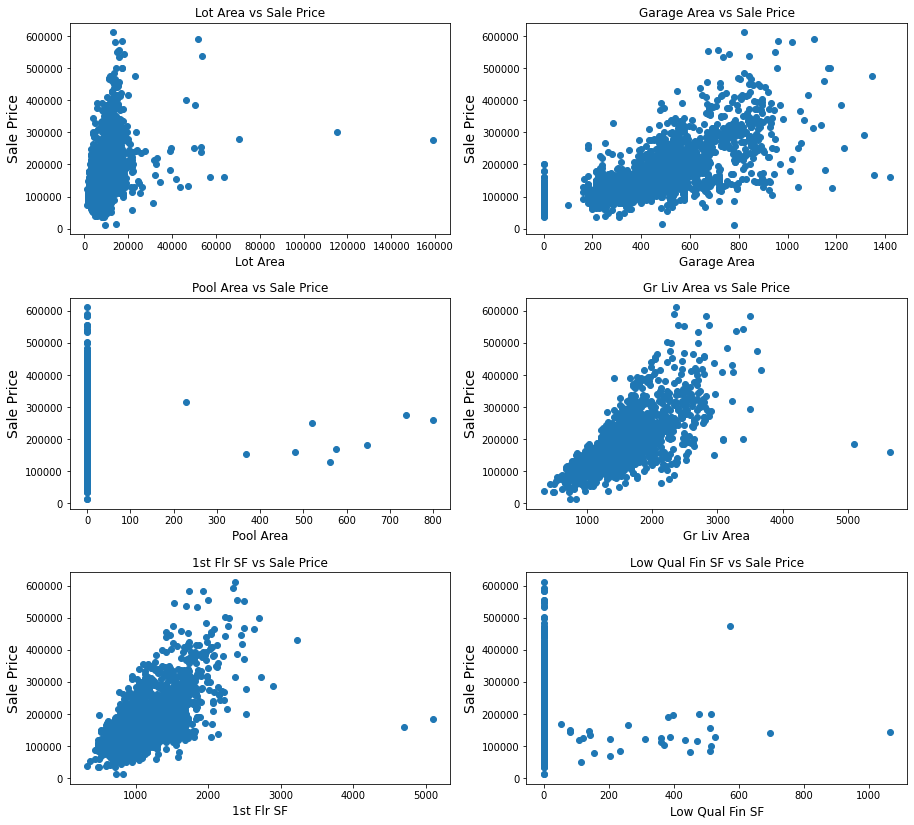

In [54]:
# Scatterplot of variables of interest

#Alternative simple plot
#fig, axes = plt.subplots(3,2, figsize=(14,12))
#for i in range(6):
#    housing.plot(kind='scatter',x=investigate_col[i],y='SalePrice',ax=axes.flatten()[i])

fig, axes = plt.subplots(3,2, figsize=(15,14))
for i in range(6):
    axes.flatten()[i].scatter(housing[investigate_col[i]],housing['SalePrice'])
    axes.flatten()[i].set_xlabel(investigate_col[i],fontsize=12)
    axes.flatten()[i].set_ylabel('Sale Price',fontsize=14)
    axes.flatten()[i].set_title(str(investigate_col[i])+" vs Sale Price")
    
plt.subplots_adjust(hspace=0.3)

Notice 2 obvious outliers for '1st Flr SF', 'Gr Liv Area' and 'Lot Area'. 
Notice 3 obvious outliers for 'Low Qual Fin SF'.
Notice only 9 non-zero 'Pool Area' out of 2044 observations. Do not forsee it will be a main predictor.

'1st Fir SF', 'Gr Liv Area' and 'Garage Area' have some linear relatioship with 'SalePrice', suggesting they could be important predictors.

In [55]:
# Drop 2 observations with unusually high 'Gr Liv Area'
housing.drop(housing[housing['Gr Liv Area']>4000].index,axis=0,inplace=True)

In [56]:
# find the 3 largest 'Low Qual Fin SF'
housing[housing['Low Qual Fin SF']>550]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
828,661,50,RL,60,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1915,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1313,1313,GasA,TA,Y,SBrkr,1313,0,1064,2377,0,0,2,0,3,1,Gd,8,Min2,1,TA,Detchd,1954,Unf,2,528,TA,TA,Y,0,0,432,0,0,0,NA,NA,NA,0,6,2009,WD,142900
1035,2667,75,RM,90,22950,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NA,GdPrv,NA,0,6,2006,WD,475000
1239,1362,50,RM,60,6876,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1938,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1272,1272,GasA,TA,Y,SBrkr,1272,0,697,1969,0,0,2,0,4,1,TA,9,Min1,1,Gd,Detchd,1938,Unf,2,400,TA,TA,Y,0,34,0,0,0,0,NA,NA,NA,0,11,2008,COD,141000


In [57]:
# Drop 3 observations with unusually high 'Low Qual Fin SF'
housing.drop(housing[housing['Low Qual Fin SF']>550].index,axis=0,inplace=True)

In [58]:
# check if Lot Area already dropped 
housing[housing['Lot Area']>100_000] # Not yet

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,50,RL,69,159000,Pave,NA,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NA,NA,Shed,500,6,2007,WD,277000
694,2072,20,RL,69,115149,Pave,NA,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NA,NA,NA,0,6,2007,WD,302000


In [59]:
# Drop 2 observations with unusually high 'Lot Area'
housing.drop(housing[housing['Lot Area']>100_000].index,axis=0,inplace=True)

In [60]:
# check if 1st Flr SF already dropped 
housing[housing['1st Flr SF']>4000] # Dropped already

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


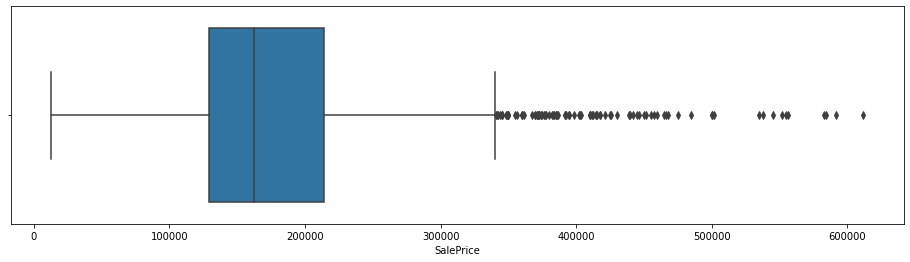

In [61]:
# Boxplot of Sale Price
# no exceptionally big outliers to remove
plt.figure(figsize=(16,4))
sns.boxplot(housing['SalePrice']);

### Correlation

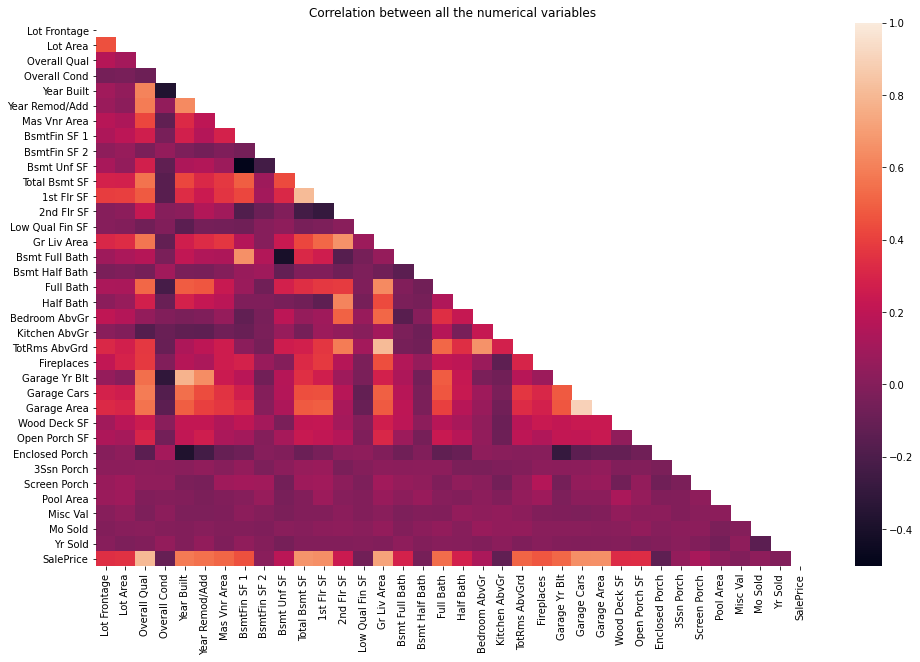

In [62]:
# Establish size of figure.
plt.figure(figsize=(16,10))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(housing.corr().iloc[1:,1:])
mask[np.triu_indices_from(mask)] = True

sns.heatmap(housing.corr().iloc[1:,1:], mask=mask).set(title="Correlation between all the numerical variables");

There are 6 obvious slight negatively correlated variables (~-0.4) such as:
- Overall Cond vs Year Built 
- Overall Cond vs Garage Yr Blt
- Bsmt Full Bath vs Bsmt Unf SF
- Bsmt Unf SF vs BsmtFin SF 1
- Enclosed Porch vs Year Built
- Enclosed Porch vs Garage Yr Blt

There are 2 obvious highly positively correlated variables (~ 0.9) such as:
- TotRms AbvGrd vs Gr Liv Area
- Garage Area vs Garage Cars

For these variables, I will like to __create interaction term for them later__.

Overall, I also don't see any meaningless variables in relationship with Sale Price to drop them.
However, for TotRms AbvGrd, Gr Liv Area, Garage Area and Garage Cars, I should drop two of them due to high correlation with each other, breaking the multi linear regression assumption. Earlier I discovered that Garage Area is likely a good predictor for SalePrice based on scatterplot. Based on above correlation heatmap, I can deduce that Garage Cars is of similar correlation coefficient with Garage Area to SalePrice. 

Looking at the meaning, Garage Cars is size of garage in car capacity while Garage Area is size of garage in square feet. Hence, there is not much reason to keep both. Shall keep the more accurate measurement which is Garage Area and __drop Garage Cars__.

Let's investigate for TotRms AbvGrd and Gr Liv Area now.

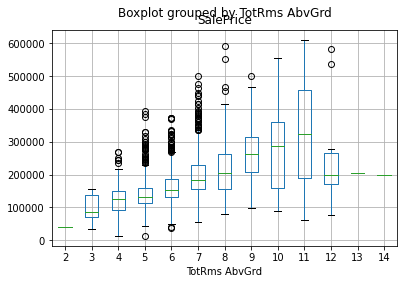

In [63]:
# Plot scatterplot for TotRms AbvGrd with Sale Price
housing.boxplot(column='SalePrice',by='TotRms AbvGrd');

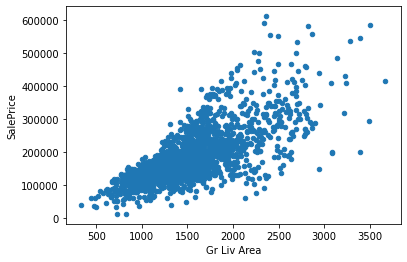

In [64]:
# Plot scatterplot for Gr Liv Area with Sale Price
housing.plot(kind='scatter',x='Gr Liv Area',y= 'SalePrice');

Both have convincing relationship with SalePrice. Looking at the correlation heatmap earlier, I have decide to __drop TotRms AbvGrd__ instead.

In [65]:
# Take a look at correlation with Sale Price
housing.corr().iloc[:,-1].sort_values()

Enclosed Porch    -0.134679
Kitchen AbvGr     -0.125471
Overall Cond      -0.103504
Low Qual Fin SF   -0.066843
Id                -0.054623
Bsmt Half Bath    -0.047419
Yr Sold           -0.012694
Misc Val          -0.010705
BsmtFin SF 2       0.015735
Pool Area          0.026173
Mo Sold            0.031814
3Ssn Porch         0.049380
Screen Porch       0.124858
Bedroom AbvGr      0.134051
Bsmt Unf SF        0.189326
2nd Flr SF         0.246541
Half Bath          0.283330
Bsmt Full Bath     0.287046
Wood Deck SF       0.330674
Open Porch SF      0.334118
Lot Frontage       0.338306
Lot Area           0.348839
BsmtFin SF 1       0.449446
Fireplaces         0.470020
TotRms AbvGrd      0.507771
Mas Vnr Area       0.513072
Garage Yr Blt      0.520741
Full Bath          0.538504
Year Remod/Add     0.550795
Year Built         0.581161
Garage Cars        0.648401
1st Flr SF         0.652384
Garage Area        0.654813
Total Bsmt SF      0.671185
Gr Liv Area        0.720082
Overall Qual       0

Misc Val, BsmtFin SF 2 and Pool Area have little linear relationship with Sale Price. Earlier already concluded Pool Area will not be a good predictor.
Let's plot to take a look.

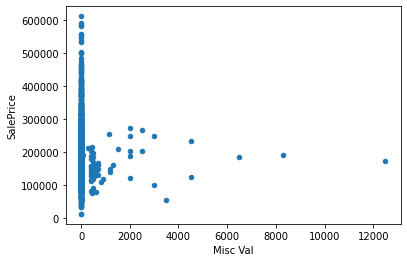

In [66]:
housing.plot(kind='scatter',x='Misc Val',y= 'SalePrice');

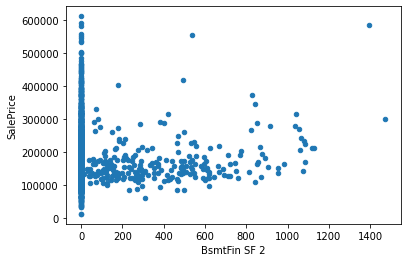

In [67]:
housing.plot(kind='scatter',x='BsmtFin SF 2',y= 'SalePrice');

Looking at the plot, I have decide to __drop 'Pool Area' and 'Misc Val'__ variable to be possible predictors.
I also decide to __drop 'Pool QC'__ since Pool Area and Pool QC should be hand-in-hand as predictors. 

### Feature Selection

In [68]:
def plot_graph(df):
    for col in df.columns:
        if df[col].dtypes==int or df[col].dtypes==float:
            plt.subplots()
            plot_scatter(df[col],df['SalePrice'],col)     
        if df[col].dtypes==object:
            plt.subplots()
            sns.boxplot(df[col],df['SalePrice'])

In [69]:
def plot_scatter(x,y,col):
    mean=x.mean()
    median=x.median()
    mode=pd.DataFrame(x.mode())[0][0]
    plt.scatter(x,y)
    plt.xlabel(str(col))
    plt.ylabel("Sale Price")
    plt.axvline(mean, color='green')
    plt.axvline(median, color='red')
    plt.axvline(mode, color='purple')
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [70]:
housing.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish',

In [71]:
housing_display_1 = housing[['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'SalePrice']]

In [72]:
housing_display_2 = housing[['Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath','SalePrice']]

In [73]:
housing_display_3 = housing[['Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature',
       'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type', 'SalePrice']]

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

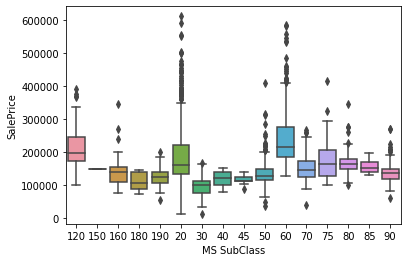

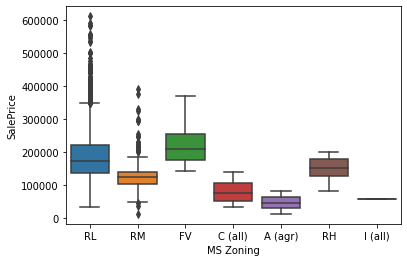

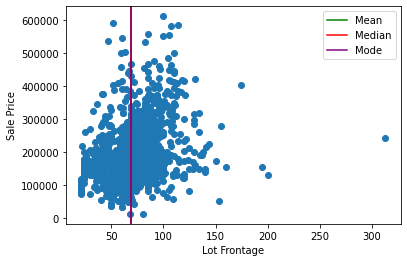

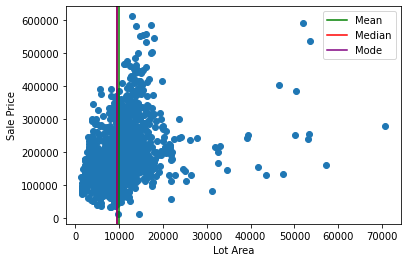

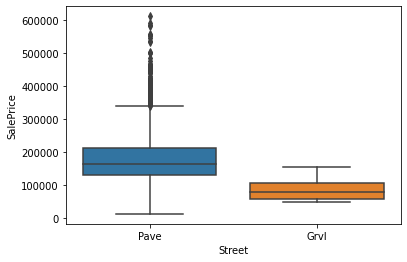

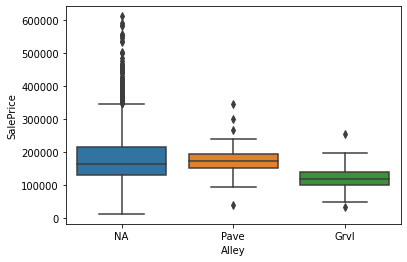

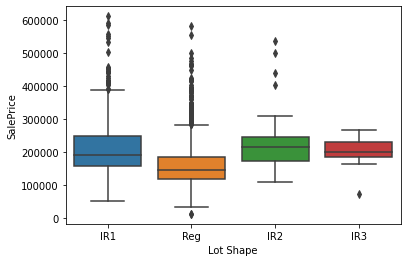

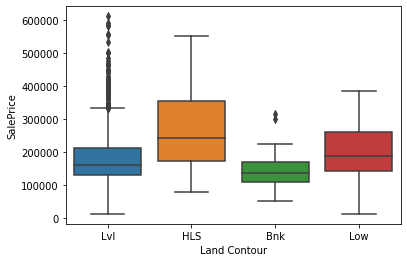

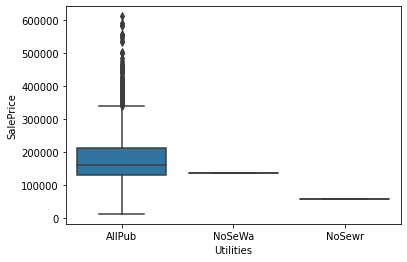

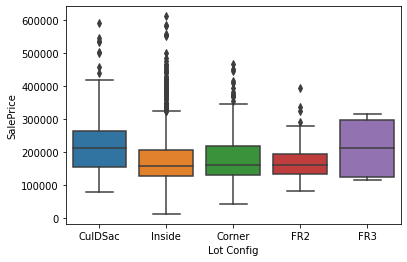

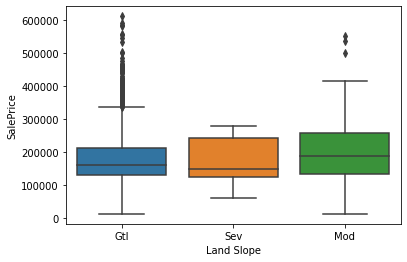

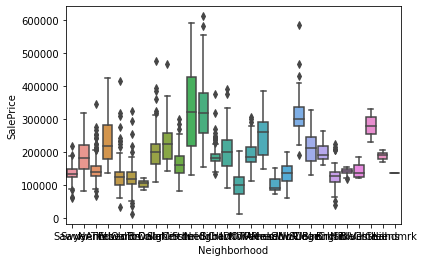

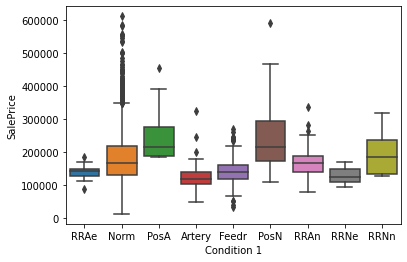

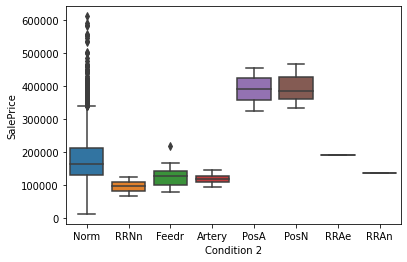

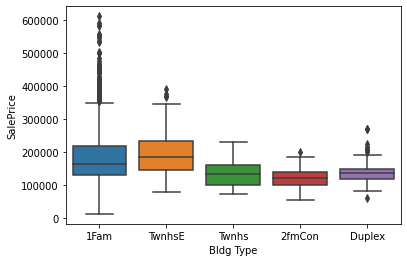

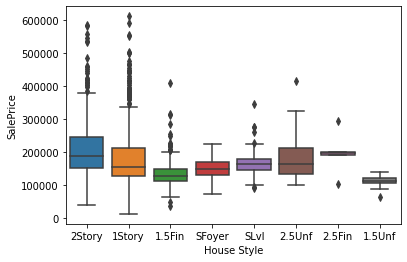

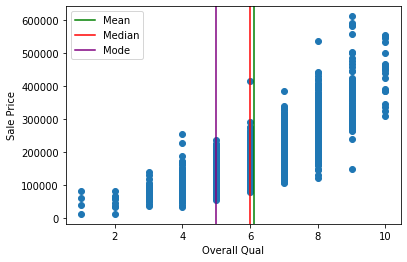

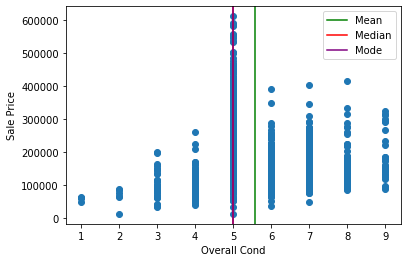

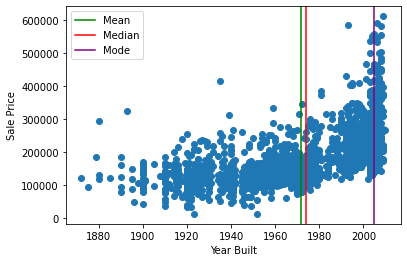

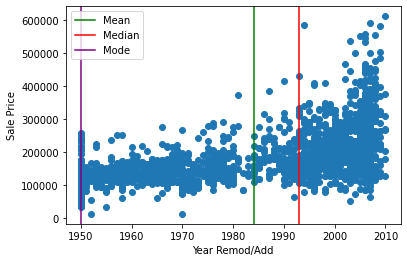

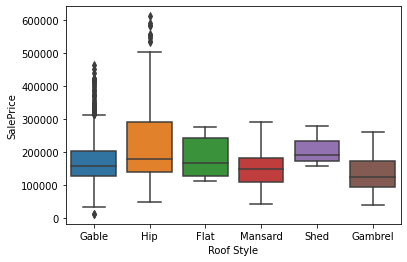

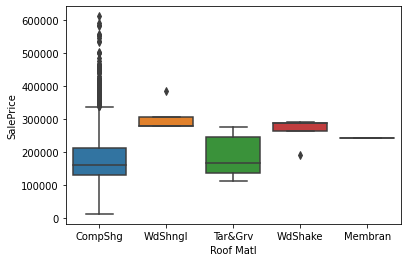

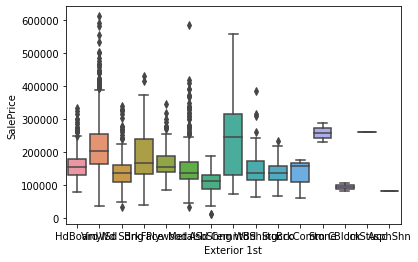

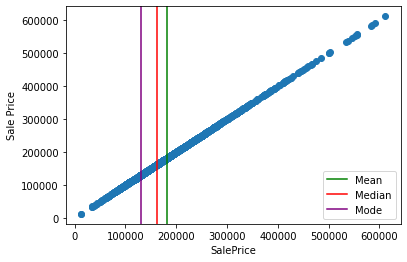

In [74]:
plot_graph(housing_display_1)

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


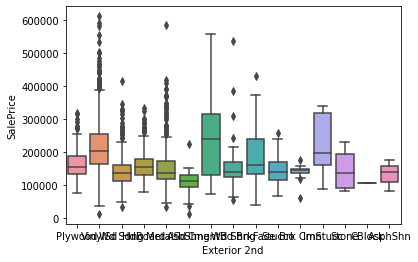

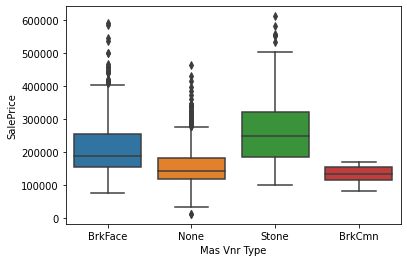

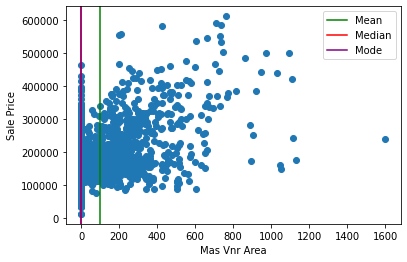

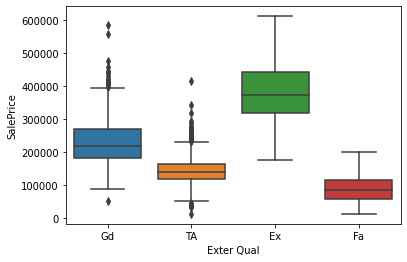

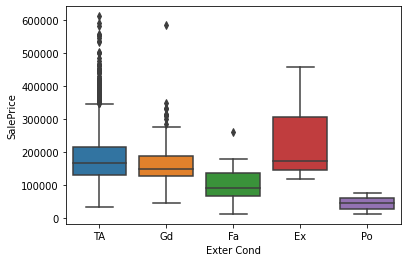

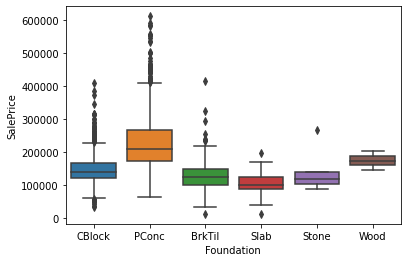

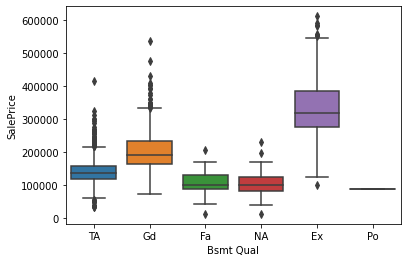

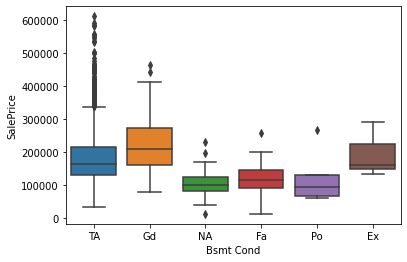

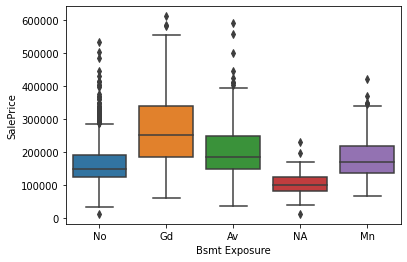

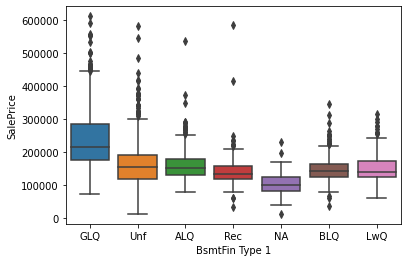

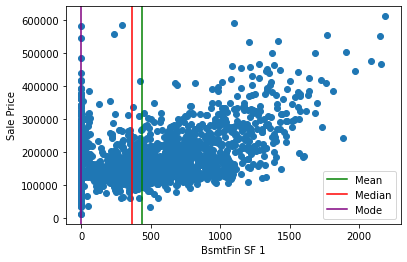

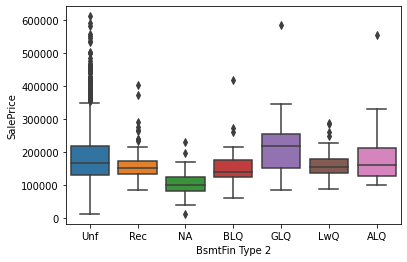

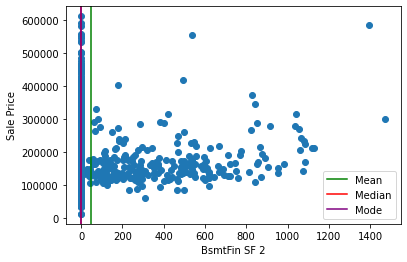

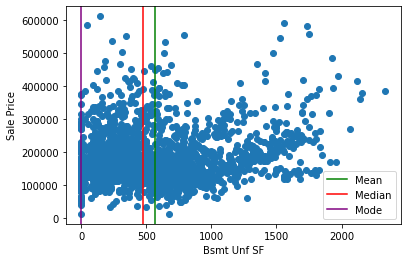

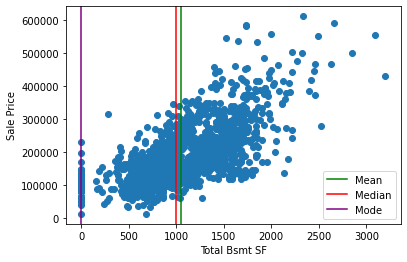

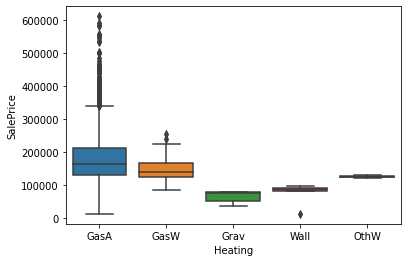

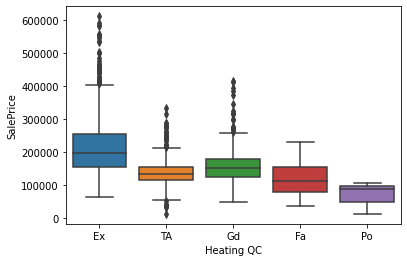

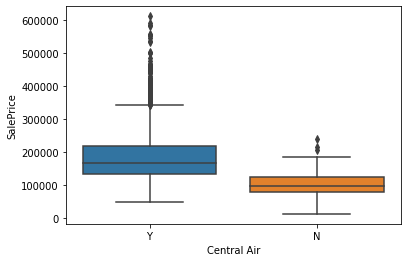

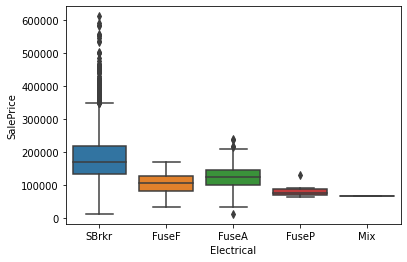

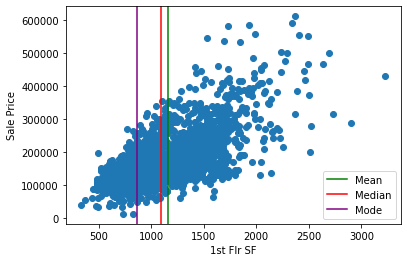

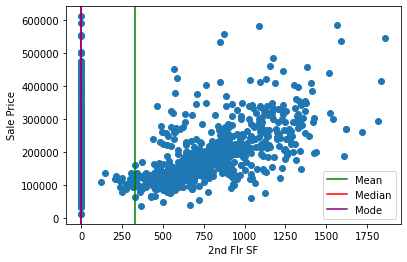

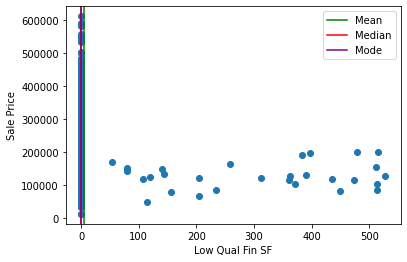

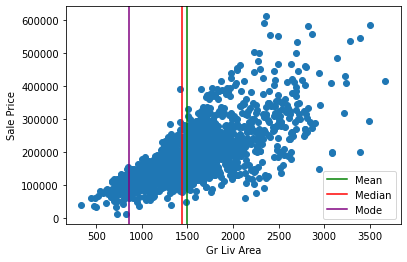

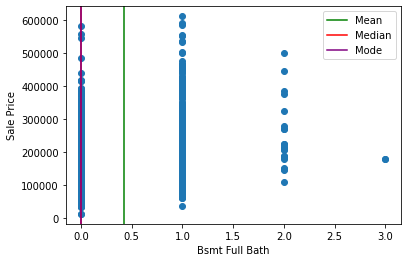

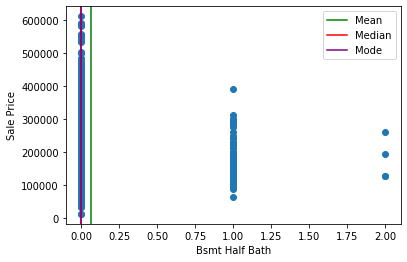

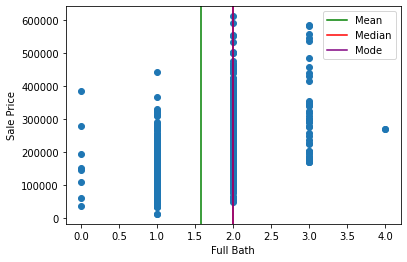

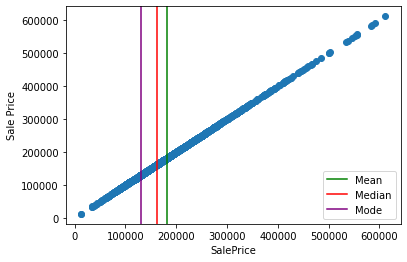

In [75]:
plot_graph(housing_display_2)

/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and

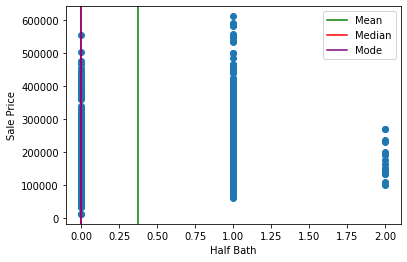

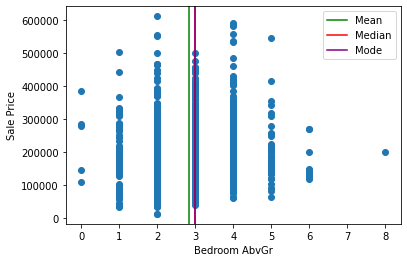

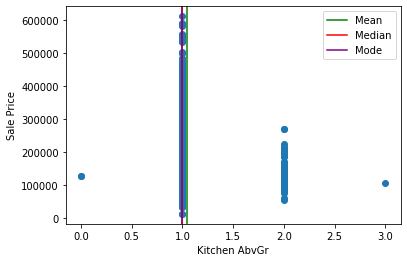

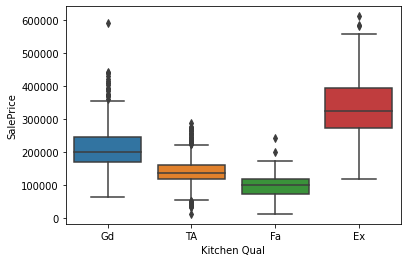

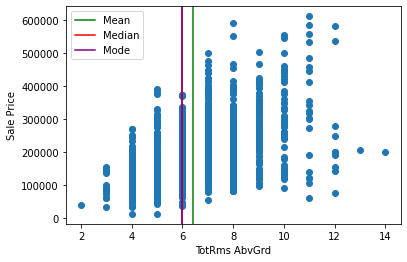

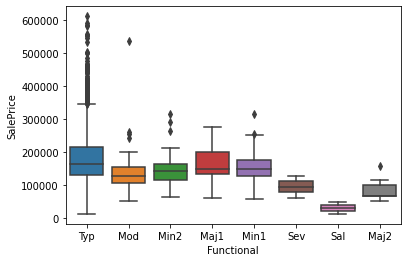

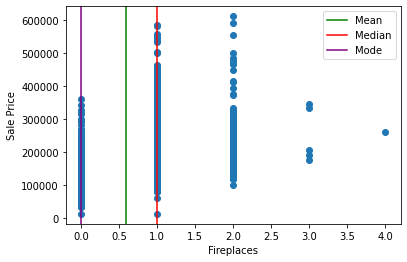

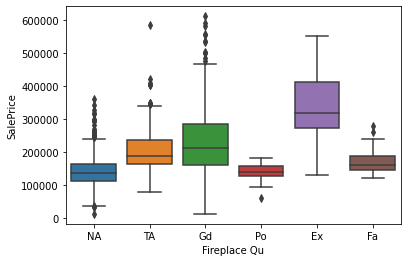

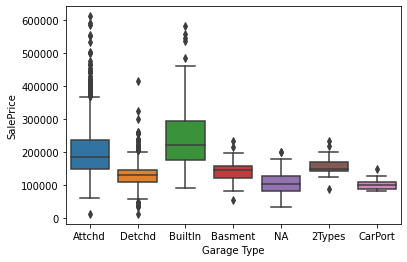

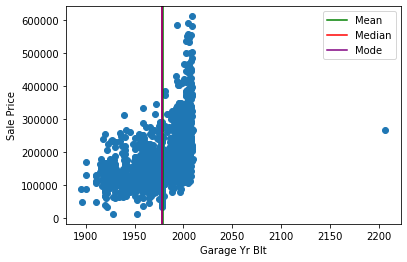

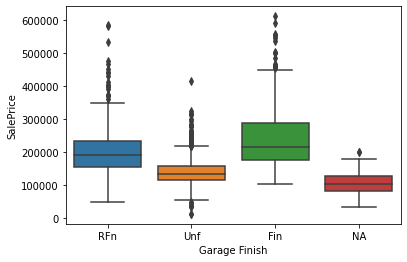

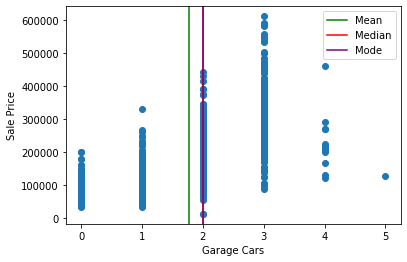

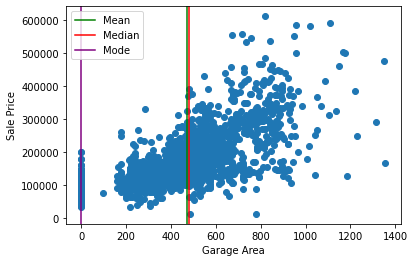

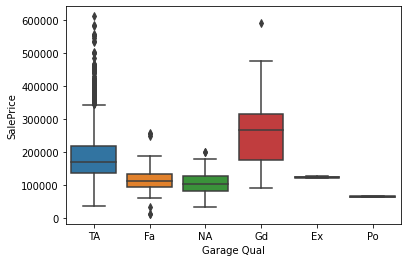

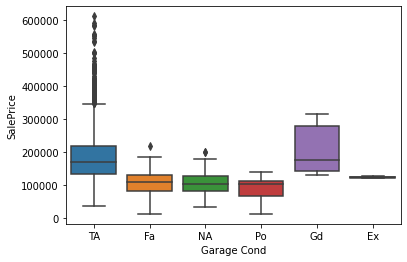

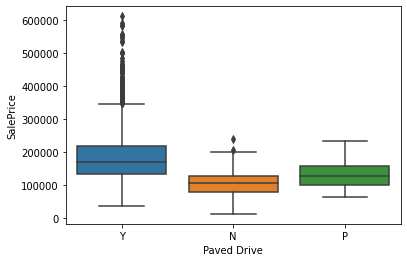

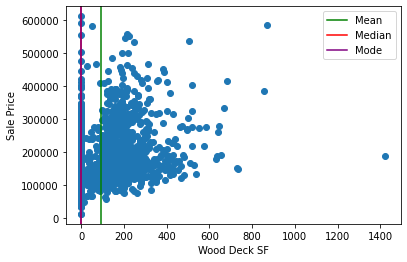

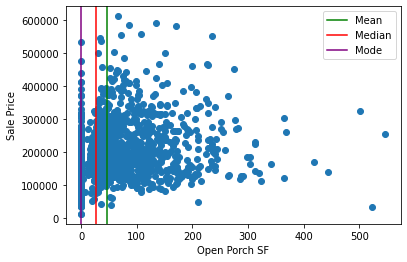

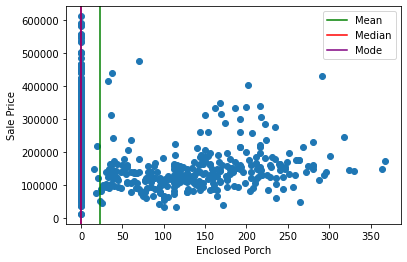

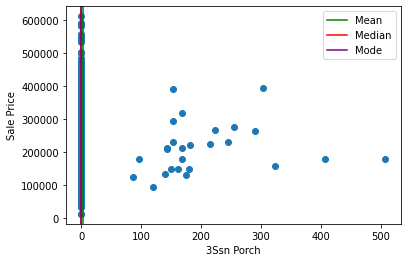

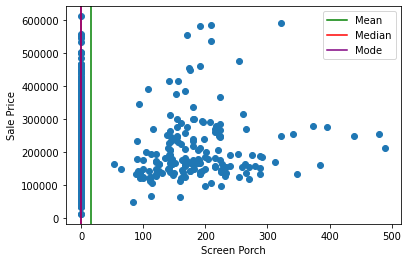

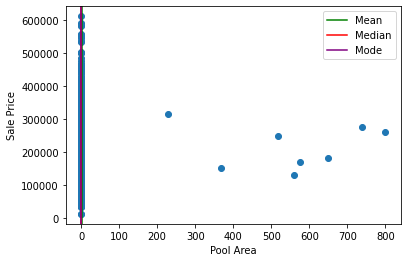

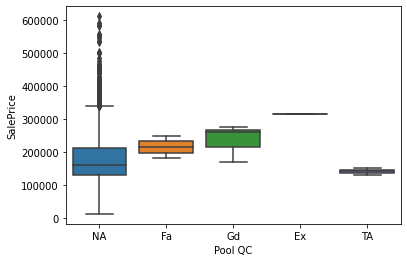

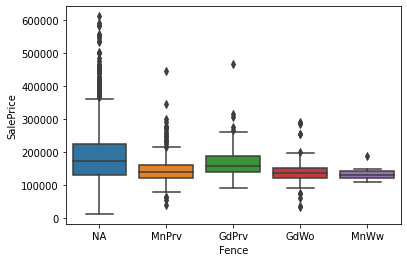

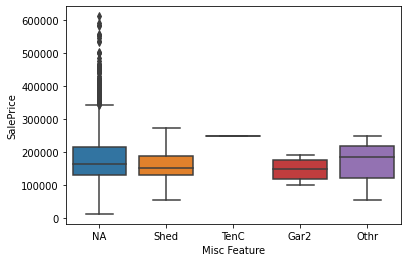

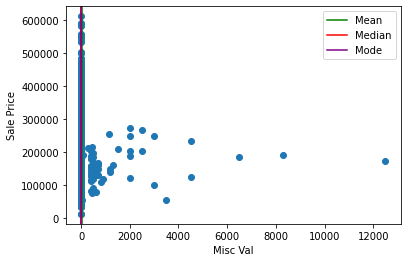

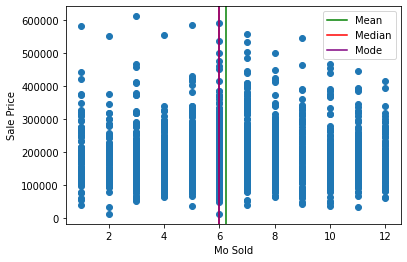

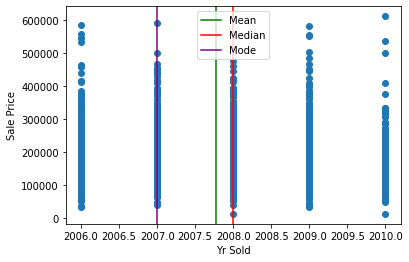

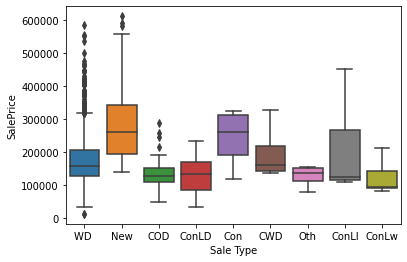

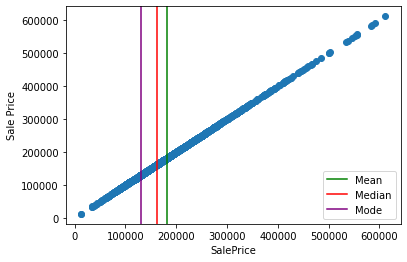

In [76]:
plot_graph(housing_display_3)

After plotting, those with no linear relationship with Sale Price for scatterplot or those with no difference in boxplot for different values against Sale Price will be dropped from modeling later.

In [77]:
dropcol = ['Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config','Land Slope', 'Roof Style', 'Electrical']

In [78]:
# drop cols
housing.drop(columns=dropcol,inplace=True)
housing_test.drop(columns=dropcol,inplace=True)

In [79]:
print(housing.shape)
housing_test.shape

(2037, 72)


(879, 71)

In [80]:
# Drop 1 observation which is most likely a typo found during the plotting
housing.drop(housing[housing['Garage Yr Blt']>2150].index,axis=0,inplace=True)

Also, after investigating the numerical variables in terms of their qualitative meaning, I have selected these few that I suspect may be the main predictors to execute feature engineering:

Set 1:
- Overall Qual
- Overall Cond
- 1st Flr SF 
- 2nd Flr SF 
- Low Qual Fin SF 
- Gr Liv Area 

Set 2:
- Bsmt Full Bath 
- Bsmt Half Bath
- Full Bath
- Half Bath 
- Bedroom AbvGr
- Kitchen AbvGr

I would like to __create higher polynomial of 2 and interaction terms for these, in addition to those mentioned above__.

## Feature Engineering: Interaction terms

In [81]:
# Create interaction terms for those with negative correlation mentioned earlier
housing['OverallCond-YearBuilt'] = housing['Overall Cond'] * housing['Year Built']
housing['OverallCond-GarageYrBlt'] = housing['Overall Cond'] * housing['Garage Yr Blt']
housing['BsmtFullBath-BsmtUnfSF'] = housing['Bsmt Full Bath'] * housing['Bsmt Unf SF']
housing['BsmtUnfSF-BsmtFinSF1'] = housing['Bsmt Unf SF'] * housing['BsmtFin SF 1']
housing['EnclosedPorch-YearBuilt'] = housing['Enclosed Porch'] * housing['Year Built']
housing['EnclosedPorch-GarageYrBlt'] = housing['Enclosed Porch'] * housing['Garage Yr Blt']

housing_test['OverallCond-YearBuilt'] = housing_test['Overall Cond'] * housing_test['Year Built']
housing_test['OverallCond-GarageYrBlt'] = housing_test['Overall Cond'] * housing_test['Garage Yr Blt']
housing_test['BsmtFullBath-BsmtUnfSF'] = housing_test['Bsmt Full Bath'] * housing_test['Bsmt Unf SF']
housing_test['BsmtUnfSF-BsmtFinSF1'] = housing_test['Bsmt Unf SF'] * housing_test['BsmtFin SF 1']
housing_test['EnclosedPorch-YearBuilt'] = housing_test['Enclosed Porch'] * housing_test['Year Built']
housing_test['EnclosedPorch-GarageYrBlt'] = housing_test['Enclosed Porch'] * housing_test['Garage Yr Blt']

In [82]:
# check shape from 72 columns to 78
print(housing.shape)
# check shape from 71 columns to 77
housing_test.shape

(2036, 78)


(879, 77)

In [83]:
# Create 2 sets list
set_1 = ['Overall Qual', 'Overall Cond', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area']
set_2 = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr']
X_set_1 = housing[set_1]
X_set_2 = housing[set_2]
X_set_1_test = housing_test[set_1]
X_set_2_test = housing_test[set_2]

In [84]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)

# Create interaction terms and polynomial features for those selected earlier
poly_set_1 = poly.fit_transform(X_set_1)
poly_set_2 = poly.fit_transform(X_set_2)
poly_set_1_test = poly.fit_transform(X_set_1_test)
poly_set_2_test = poly.fit_transform(X_set_2_test)

In [85]:
# View polynomial features set 1 in a DataFrame for training dataset
X_poly_1 = pd.DataFrame(poly_set_1,columns=poly.get_feature_names(set_1))
X_poly_1.head()

,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual 2nd Flr SF,Overall Qual Low Qual Fin SF,Overall Qual Gr Liv Area,Overall Cond^2,Overall Cond 1st Flr SF,Overall Cond 2nd Flr SF,Overall Cond Low Qual Fin SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF 2nd Flr SF,1st Flr SF Low Qual Fin SF,1st Flr SF Gr Liv Area,2nd Flr SF^2,2nd Flr SF Low Qual Fin SF,2nd Flr SF Gr Liv Area,Low Qual Fin SF^2,Low Qual Fin SF Gr Liv Area,Gr Liv Area^2
0,6.0,8.0,725.0,754.0,0.0,1479.0,36.0,48.0,4350.0,4524.0,0.0,8874.0,64.0,5800.0,6032.0,0.0,11832.0,525625.0,546650.0,0.0,1072275.0,568516.0,0.0,1115166.0,0.0,0.0,2187441.0
1,7.0,5.0,913.0,1209.0,0.0,2122.0,49.0,35.0,6391.0,8463.0,0.0,14854.0,25.0,4565.0,6045.0,0.0,10610.0,833569.0,1103817.0,0.0,1937386.0,1461681.0,0.0,2565498.0,0.0,0.0,4502884.0
2,5.0,7.0,1057.0,0.0,0.0,1057.0,25.0,35.0,5285.0,0.0,0.0,5285.0,49.0,7399.0,0.0,0.0,7399.0,1117249.0,0.0,0.0,1117249.0,0.0,0.0,0.0,0.0,0.0,1117249.0
3,5.0,5.0,744.0,700.0,0.0,1444.0,25.0,25.0,3720.0,3500.0,0.0,7220.0,25.0,3720.0,3500.0,0.0,7220.0,553536.0,520800.0,0.0,1074336.0,490000.0,0.0,1010800.0,0.0,0.0,2085136.0
4,6.0,8.0,831.0,614.0,0.0,1445.0,36.0,48.0,4986.0,3684.0,0.0,8670.0,64.0,6648.0,4912.0,0.0,11560.0,690561.0,510234.0,0.0,1200795.0,376996.0,0.0,887230.0,0.0,0.0,2088025.0


In [86]:
# View polynomial features set 1 in a DataFrame for testing dataset
X_poly_1_test = pd.DataFrame(poly_set_1_test,columns=poly.get_feature_names(set_1))
X_poly_1_test.shape

(879, 27)

In [87]:
# View polynomial features set 2 in a DataFrame for training dataset
X_poly_2 = pd.DataFrame(poly_set_2,columns=poly.get_feature_names(set_2))
X_poly_2.head()

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Bsmt Full Bath^2,Bsmt Full Bath Bsmt Half Bath,Bsmt Full Bath Full Bath,Bsmt Full Bath Half Bath,Bsmt Full Bath Bedroom AbvGr,Bsmt Full Bath Kitchen AbvGr,Bsmt Half Bath^2,Bsmt Half Bath Full Bath,Bsmt Half Bath Half Bath,Bsmt Half Bath Bedroom AbvGr,Bsmt Half Bath Kitchen AbvGr,Full Bath^2,Full Bath Half Bath,Full Bath Bedroom AbvGr,Full Bath Kitchen AbvGr,Half Bath^2,Half Bath Bedroom AbvGr,Half Bath Kitchen AbvGr,Bedroom AbvGr^2,Bedroom AbvGr Kitchen AbvGr,Kitchen AbvGr^2
0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,6.0,2.0,1.0,3.0,1.0,9.0,3.0,1.0
1,1.0,0.0,2.0,1.0,4.0,1.0,1.0,0.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,8.0,2.0,1.0,4.0,1.0,16.0,4.0,1.0
2,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,9.0,3.0,1.0
3,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,6.0,2.0,1.0,3.0,1.0,9.0,3.0,1.0
4,0.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,6.0,2.0,0.0,0.0,0.0,9.0,3.0,1.0


In [88]:
# View polynomial features set 2 in a DataFrame for testing dataset
X_poly_2_test = pd.DataFrame(poly_set_2_test,columns=poly.get_feature_names(set_2))
X_poly_2_test.shape

(879, 27)

In [89]:
# Reset index
housing.reset_index(drop=True,inplace=True)
# Append 'Id' for the merge to work properly
X_poly_1['Id'] = housing['Id']
X_poly_2['Id'] = housing['Id']
X_poly_1_test['Id'] = housing_test['Id']
X_poly_2_test['Id'] = housing_test['Id']
# Append to housing dataframe
housing = pd.merge(housing,X_poly_1,how='outer')
housing = pd.merge(housing,X_poly_2,how='outer')
housing_test = pd.merge(housing_test,X_poly_1_test,how='outer')
housing_test = pd.merge(housing_test,X_poly_2_test,how='outer')

In [90]:
# check shape
print(housing.shape)
# check column increase from 78 to 120
housing_test.shape
# check column increase from 77 to 119


(2036, 120)


(879, 119)

In [91]:
# check dataframe
housing.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,OverallCond-YearBuilt,OverallCond-GarageYrBlt,BsmtFullBath-BsmtUnfSF,BsmtUnfSF-BsmtFinSF1,EnclosedPorch-YearBuilt,EnclosedPorch-GarageYrBlt,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual 2nd Flr SF,Overall Qual Low Qual Fin SF,Overall Qual Gr Liv Area,Overall Cond^2,Overall Cond 1st Flr SF,Overall Cond 2nd Flr SF,Overall Cond Low Qual Fin SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF 2nd Flr SF,1st Flr SF Low Qual Fin SF,1st Flr SF Gr Liv Area,2nd Flr SF^2,2nd Flr SF Low Qual Fin SF,2nd Flr SF Gr Liv Area,Low Qual Fin SF^2,Low Qual Fin SF Gr Liv Area,Gr Liv Area^2,Bsmt Full Bath^2,Bsmt Full Bath Bsmt Half Bath,Bsmt Full Bath Full Bath,Bsmt Full Bath Half Bath,Bsmt Full Bath Bedroom AbvGr,Bsmt Full Bath Kitchen AbvGr,Bsmt Half Bath^2,Bsmt Half Bath Full Bath,Bsmt Half Bath Half Bath,Bsmt Half Bath Bedroom AbvGr,Bsmt Half Bath Kitchen AbvGr,Full Bath^2,Full Bath Half Bath,Full Bath Bedroom AbvGr,Full Bath Kitchen AbvGr,Half Bath^2,Half Bath Bedroom AbvGr,Half Bath Kitchen AbvGr,Bedroom AbvGr^2,Bedroom AbvGr Kitchen AbvGr,Kitchen AbvGr^2
0,109,60,RL,69,13517,Pave,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500,15808,15808,0,102336,0,0,36.0,48.0,4350.0,4524.0,0.0,8874.0,64.0,5800.0,6032.0,0.0,11832.0,525625.0,546650.0,0.0,1072275.0,568516.0,0.0,1115166.0,0.0,0.0,2187441.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,6.0,2.0,1.0,3.0,1.0,9.0,3.0,1.0
1,544,60,RL,43,11492,Pave,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000,9980,9985,276,175812,0,0,49.0,35.0,6391.0,8463.0,0.0,14854.0,25.0,4565.0,6045.0,0.0,10610.0,833569.0,1103817.0,0.0,1937386.0,1461681.0,0.0,2565498.0,0.0,0.0,4502884.0,1.0,0.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,8.0,2.0,1.0,4.0,1.0,16.0,4.0,1.0
2,153,20,RL,68,7922,Pave,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000,13671,13671,326,238306,0,0,25.0,35.0,5285.0,0.0,0.0,5285.0,49.0,7399.0,0.0,0.0,7399.0,1117249.0,0.0,0.0,1117249.0,0.0,0.0,0.0,0.0,0.0,1117249.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,9.0,3.0,1.0
3,318,60,RL,73,9802,Pave,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000,10030,10035,0,0,0,0,25.0,25.0,3720.0,3500.0,0.0,7220.0,25.0,3720.0,3500.0,0.0,7220.0,553536.0,520800.0,0.0,1074336.0,490000.0,0.0,1010800.0,0.0,0.0,2085136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,6.0,2.0,1.0,3.0,1.0,9.0,3.0,1.0
4,255,50,RL,82,14235,Pave

In [92]:
# check dataframe
housing_test.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,OverallCond-YearBuilt,OverallCond-GarageYrBlt,BsmtFullBath-BsmtUnfSF,BsmtUnfSF-BsmtFinSF1,EnclosedPorch-YearBuilt,EnclosedPorch-GarageYrBlt,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual 2nd Flr SF,Overall Qual Low Qual Fin SF,Overall Qual Gr Liv Area,Overall Cond^2,Overall Cond 1st Flr SF,Overall Cond 2nd Flr SF,Overall Cond Low Qual Fin SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF 2nd Flr SF,1st Flr SF Low Qual Fin SF,1st Flr SF Gr Liv Area,2nd Flr SF^2,2nd Flr SF Low Qual Fin SF,2nd Flr SF Gr Liv Area,Low Qual Fin SF^2,Low Qual Fin SF Gr Liv Area,Gr Liv Area^2,Bsmt Full Bath^2,Bsmt Full Bath Bsmt Half Bath,Bsmt Full Bath Full Bath,Bsmt Full Bath Half Bath,Bsmt Full Bath Bedroom AbvGr,Bsmt Full Bath Kitchen AbvGr,Bsmt Half Bath^2,Bsmt Half Bath Full Bath,Bsmt Half Bath Half Bath,Bsmt Half Bath Bedroom AbvGr,Bsmt Half Bath Kitchen AbvGr,Full Bath^2,Full Bath Half Bath,Full Bath Bedroom AbvGr,Full Bath Kitchen AbvGr,Half Bath^2,Half Bath Bedroom AbvGr,Half Bath Kitchen AbvGr,Bedroom AbvGr^2,Bedroom AbvGr Kitchen AbvGr,Kitchen AbvGr^2
0,2658,190,RM,69,9142,Pave,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,CompShg,AsbShng,AsbShng,None,0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,15280,15280,0,0,213920,213920,36.0,48.0,5448.0,6120.0,0.0,11568.0,64.0,7264.0,8160.0,0.0,15424.0,824464.0,926160.0,0.0,1750624.0,1040400.0,0.0,1966560.0,0.0,0.0,3717184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8.0,4.0,0.0,0.0,0.0,16.0,8.0,4.0
1,2718,90,RL,69,9662,Pave,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,7908,7908,0,0,0,0,25.0,20.0,9835.0,0.0,0.0,9835.0,16.0,7868.0,0.0,0.0,7868.0,3869089.0,0.0,0.0,3869089.0,0.0,0.0,0.0,0.0,0.0,3869089.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,12.0,4.0,0.0,0.0,0.0,36.0,12.0,4.0
2,2414,60,RL,58,17104,Pave,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,10030,10030,100,55400,0,0,49.0,35.0,4648.0,5824.0,0.0,10472.0,25.0,3320.0,4160.0,0.0,7480.0,440896.0,552448.0,0.0,993344.0,692224.0,0.0,1244672.0,0.0,0.0,2238016.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,6.0,2.0,1.0,3.0,1.0,9.0,3.0,1.0
3,1989,30,RM,60,8520,Pave,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,CompShg,Wd Sdng,Wd Sdng,None,0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD,11538,11610,0,0,353832,356040,25.0,30.0,4840.0,0.0,0.0,4840.0,36.0,5808.0,0.0,0.0,5808.0,937024.0,0.0,0.0,937024.0,0.0,0.0,0.0,0.0,0.0,937024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,2.0,1.0
4,625,20,RL,69,9500,Pave,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,CompShg,P

## Drop columns

Earlier we decided to drop these 4 variables: 'Pool Area','Misc Val','Pool QC','Garage Cars'.
Let's execute it now

In [93]:
# Drop 4 variables
housing.drop(['Pool Area','Misc Val','Pool QC','Garage Cars'],axis=1,inplace=True)
housing_test.drop(['Pool Area','Misc Val','Pool QC','Garage Cars'],axis=1,inplace=True)

In [94]:
# check shape
print(housing.shape)
# check column decrease from 120 to 116
housing_test.shape
# check column increase from 119 to 115

(2036, 116)


(879, 115)

## Data Conversion: String to integer

In [95]:
# Set dictionary conversion
ex_po_dict = {
    "Ex": 4,
    "Gd": 3,
    "TA": 2,
    "Fa": 1,
    "Po": 0 
}

ex_na_dict = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0
}

glq_na_dict = {
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
}
gd_na_dict = {
    "Gd": 4,
    "Av": 3,
    "Mn": 2,
    "No": 1,
    "NA": 0
}

In [96]:
# Conversion
housing['Bsmt Exposure'] = housing['Bsmt Exposure'].map(gd_na_dict)
housing_test['Bsmt Exposure'] = housing_test['Bsmt Exposure'].map(gd_na_dict)


housing['BsmtFin Type 1'] = housing['BsmtFin Type 1'].map(glq_na_dict)
housing_test['BsmtFin Type 1'] = housing_test['BsmtFin Type 1'].map(glq_na_dict)

housing['BsmtFin Type 2'] = housing['BsmtFin Type 2'].map(glq_na_dict)
housing_test['BsmtFin Type 2'] = housing_test['BsmtFin Type 2'].map(glq_na_dict)


housing['Bsmt Qual'] = housing['Bsmt Qual'].map(ex_na_dict)
housing_test['Bsmt Qual'] = housing_test['Bsmt Qual'].map(ex_na_dict)

housing['Bsmt Cond'] = housing['Bsmt Cond'].map(ex_na_dict)
housing_test['Bsmt Cond'] = housing_test['Bsmt Cond'].map(ex_na_dict)

housing['Fireplace Qu'] = housing['Fireplace Qu'].map(ex_na_dict)
housing_test['Fireplace Qu'] = housing_test['Fireplace Qu'].map(ex_na_dict)

housing['Garage Qual'] = housing['Garage Qual'].map(ex_na_dict)
housing_test['Garage Qual'] = housing_test['Garage Qual'].map(ex_na_dict)

housing['Garage Cond'] = housing['Garage Cond'].map(ex_na_dict)
housing_test['Garage Cond'] = housing_test['Garage Cond'].map(ex_na_dict)


housing['Exter Qual'] = housing['Exter Qual'].map(ex_po_dict)
housing_test['Exter Qual'] = housing_test['Exter Qual'].map(ex_po_dict)

housing['Exter Cond'] = housing['Exter Cond'].map(ex_po_dict)
housing_test['Exter Cond'] = housing_test['Exter Cond'].map(ex_po_dict)

housing['Heating QC'] = housing['Heating QC'].map(ex_po_dict)
housing_test['Heating QC'] = housing_test['Heating QC'].map(ex_po_dict)

housing['Kitchen Qual'] = housing['Kitchen Qual'].map(ex_po_dict)
housing_test['Kitchen Qual'] = housing_test['Kitchen Qual'].map(ex_po_dict)


housing['Central Air'].replace({"Y":1,"N":0}, inplace=True)
housing_test['Central Air'].replace({"Y":1,"N":0}, inplace=True)

In [97]:
# Set max rows to 150
pd.set_option('display.max_rows', 150)
# check datatype
housing.dtypes

Id                                 int64
MS SubClass                       object
MS Zoning                         object
Lot Frontage                       int64
Lot Area                           int64
Street                            object
Neighborhood                      object
Condition 1                       object
Condition 2                       object
Bldg Type                         object
House Style                       object
Overall Qual                       int64
Overall Cond                       int64
Year Built                         int64
Year Remod/Add                     int64
Roof Matl                         object
Exterior 1st                      object
Exterior 2nd                      object
Mas Vnr Type                      object
Mas Vnr Area                       int64
Exter Qual                         int64
Exter Cond                         int64
Foundation                        object
Bsmt Qual                          int64
Bsmt Cond       

In [98]:
housing_test.dtypes

Id                                 int64
MS SubClass                       object
MS Zoning                         object
Lot Frontage                       int64
Lot Area                           int64
Street                            object
Neighborhood                      object
Condition 1                       object
Condition 2                       object
Bldg Type                         object
House Style                       object
Overall Qual                       int64
Overall Cond                       int64
Year Built                         int64
Year Remod/Add                     int64
Roof Matl                         object
Exterior 1st                      object
Exterior 2nd                      object
Mas Vnr Type                      object
Mas Vnr Area                       int64
Exter Qual                         int64
Exter Cond                         int64
Foundation                        object
Bsmt Qual                          int64
Bsmt Cond       

In [99]:
print(housing.shape)
housing_test.shape

(2036, 116)


(879, 115)

## Final feature selection

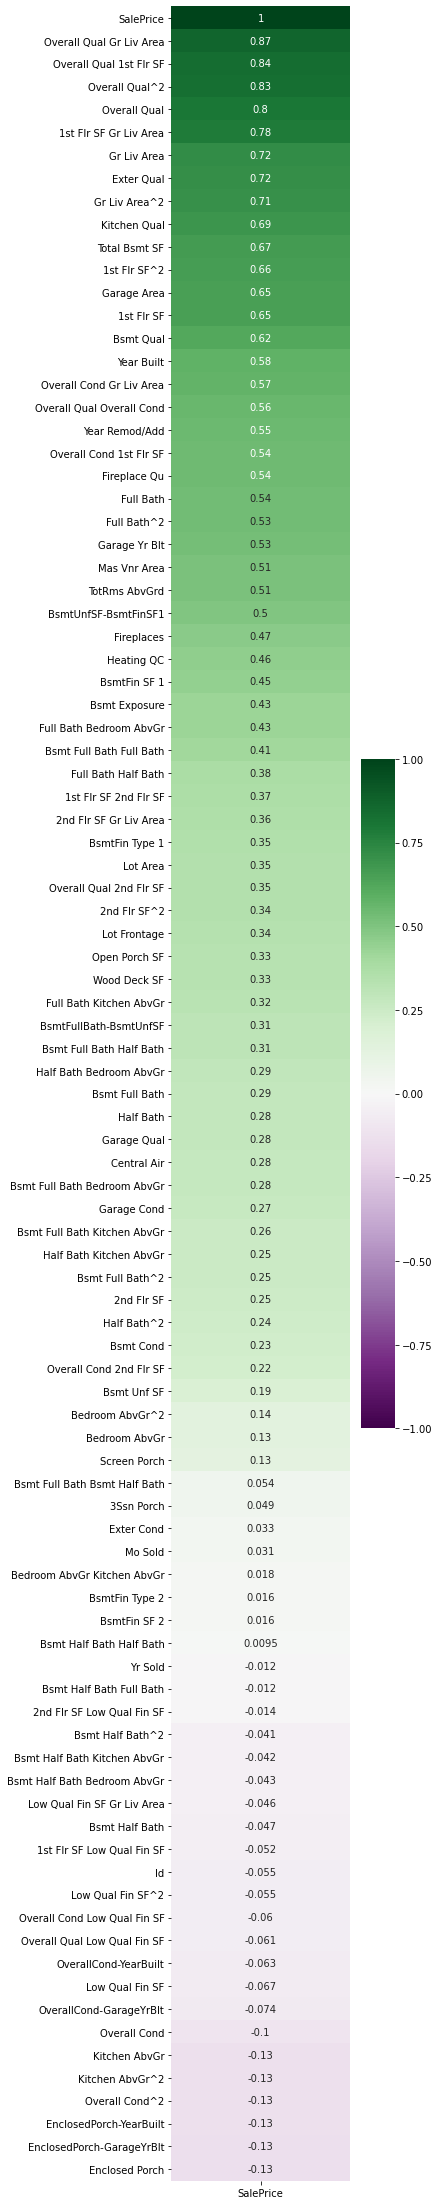

In [100]:
# correlation plot against SalePrice
plt.figure(figsize=(4,40))
corr = housing.corr().sort_values('SalePrice', ascending = False)
sns.heatmap(corr[['SalePrice']], vmin = -1, annot = True, cmap="PRGn");

In [101]:
# remove lowly correlated variable with Sale Price
def correlation(dataset_train,dataset_test, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr = dataset_train.corr().sort_values('SalePrice', ascending = False)[['SalePrice']]
    for i in range(len(corr)):
        if (abs(corr.iloc[i, 0]) < threshold):
            colname = corr.index[i] # getting the name of column
            col_corr.add(colname)
            if colname in dataset_train.columns and colname != 'SalePrice':
                del dataset_train[colname] # deleting the columns from the train set
                del dataset_test[colname] # deleting the columns from the test set
    return dataset_train,dataset_test

In [102]:
df_train,df_test = correlation(housing,housing_test,0.4)

In [103]:
df_train

,MS SubClass,MS Zoning,Street,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Year Built,Year Remod/Add,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Area,Paved Drive,Fence,Misc Feature,Sale Type,SalePrice,BsmtUnfSF-BsmtFinSF1,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual Gr Liv Area,Overall Cond 1st Flr SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF Gr Liv Area,Gr Liv Area^2,Bsmt Full Bath Full Bath,Full Bath^2,Full Bath Bedroom AbvGr
0,60,RL,Pave,Sawyer,RRAe,Norm,1Fam,2Story,6,1976,2005,CompShg,HdBoard,Plywood,BrkFace,289,3,CBlock,3,1,533,725,GasA,4,725,1479,2,3,6,Typ,0,0,Attchd,1976,RFn,475,Y,NA,NA,WD,130500,102336,36.0,48.0,4350.0,8874.0,5800.0,11832.0,525625.0,1072275.0,2187441.0,0.0,4.0,6.0
1,60,RL,Pave,SawyerW,Norm,Norm,1Fam,2Story,7,1996,1997,CompShg,VinylSd,VinylSd,BrkFace,132,3,PConc,4,1,637,913,GasA,4,913,2122,2,3,8,Typ,1,3,Attchd,1997,RFn,559,Y,NA,NA,WD,220000,175812,49.0,35.0,6391.0,14854.0,4565.0,10610.0,833569.0,1937386.0,4502884.0,2.0,4.0,8.0
2,20,RL,Pave,NAmes,Norm,Norm,1Fam,1Story,5,1953,2007,CompShg,VinylSd,VinylSd,None,0,2,CBlock,3,1,731,1057,GasA,2,1057,1057,1,3,5,Typ,0,0,Detchd,1953,Unf,246,Y,NA,NA,WD,109000,238306,25.0,35.0,5285.0,5285.0,7399.0,7399.0,1117249.0,1117249.0,1117249.0,1.0,1.0,3.0
3,60,RL,Pave,Timber,Norm,Norm,1Fam,2Story,5,2006,2007,CompShg,VinylSd,VinylSd,None,0,2,PConc,4,1,0,384,GasA,3,744,1444,2,2,7,Typ,0,0,BuiltIn,2007,Fin,400,Y,NA,NA,WD,174000,0,25.0,25.0,3720.0,7220.0,3720.0,7220.0,553536.0,1074336.0,2085136.0,0.0,4.0,6.0
4,50,RL,Pave,SawyerW,Norm,Norm,1Fam,1.5Fin,6,1900,1993,CompShg,Wd Sdng,Plywood,None,0,2,PConc,2,1,0,676,GasA,2,831,1445,2,2,6,Typ,0,0,Detchd,1957,Unf,484,N,NA,NA,WD,138500,0,36.0,48.0,4986.0,8670.0,6648.0,11560.0,690561.0,1200795.0,2088025.0,0.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,20,RL,Pave,Timber,Norm,Norm,1Fam,1Story,8,2007,2007,CompShg,VinylSd,VinylSd,None,0,3,PConc,4,3,1011,1884,GasA,4,1728,1728,2,3,7,Typ,1,4,Attchd,2007,Fin,520,Y,NA,NA,WD,298751,882603,64.0,40.0,13824.0,13824.0,8640.0,8640.0,2985984.0,2985984.0,2985984.0,2.0,4.0,6.0
2032,30,RL,Pave,Edwards,Norm,Norm,1Fam,1Story,4,1940,1950,CompShg,VinylSd,VinylSd,None,0,2,CBlock,3,1,262,861,GasA,4,861,861,1,2,4,Typ,0,0,Detchd,1961,Unf,539,Y,NA,NA,WD,82500,156938,16.0,20.0,3444.0,3444.0,4305.0,4305.0,741321.0,741321.0,741321.0,0.0,1.0,1.0
2033,50,RL,Pave,Crawfor,Norm,Norm,1Fam,1.5Fin,6,1928,1950,CompShg,BrkFace,Stone,None,0,2,BrkTil,3,1,0,896,GasA,3,1172,1913,1,2,9,Typ,1,3,Detchd,1929,Unf,342,Y,NA,NA,WD,177000,0,36.0,36.0,7032.0,11478.0,7032.0,11478.0,1373584.0,2242036.0,3659569.0,0.0,1.0,3.0
2034,20,RL,Pave,NAmes,Norm,Norm,1Fam,1Story,4,1956,1956,CompShg,Plywood,Plywood,None,0,2,CBlock,3,1,155,1200,GasA,2,1200,1200,1,2,6,Typ,2,4,Attchd,1956,Unf,294,Y,NA,NA,WD,144000,45725,16.0,20.0,4800.0,4800.0,6000.0,6000.0,1440000.0,1440000.0,1440000.0,1.0,1.0,3.0


In [104]:
df_test

,MS SubClass,MS Zoning,Street,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Year Built,Year Remod/Add,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Area,Paved Drive,Fence,Misc Feature,Sale Type,BsmtUnfSF-BsmtFinSF1,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual Gr Liv Area,Overall Cond 1st Flr SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF Gr Liv Area,Gr Liv Area^2,Bsmt Full Bath Full Bath,Full Bath^2,Full Bath Bedroom AbvGr
0,190,RM,Pave,OldTown,Norm,Norm,2fmCon,2Story,6,1910,1950,CompShg,AsbShng,AsbShng,None,0,2,Stone,2,1,0,1020,GasA,3,908,1928,2,1,9,Typ,0,0,Detchd,1910,Unf,440,Y,NA,NA,WD,0,36.0,48.0,5448.0,11568.0,7264.0,15424.0,824464.0,1750624.0,3717184.0,0.0,4.0,8.0
1,90,RL,Pave,Sawyer,Norm,Norm,Duplex,1Story,5,1977,1977,CompShg,Plywood,Plywood,None,0,2,CBlock,4,1,0,1967,GasA,2,1967,1967,2,2,10,Typ,0,0,Attchd,1977,Fin,580,Y,NA,NA,WD,0,25.0,20.0,9835.0,9835.0,7868.0,7868.0,3869089.0,3869089.0,3869089.0,0.0,4.0,12.0
2,60,RL,Pave,Gilbert,Norm,Norm,1Fam,2Story,7,2006,2006,CompShg,VinylSd,VinylSd,None,0,3,PConc,4,3,554,654,GasA,4,664,1496,2,3,7,Typ,1,4,Attchd,2006,RFn,426,Y,NA,NA,New,55400,49.0,35.0,4648.0,10472.0,3320.0,7480.0,440896.0,993344.0,2238016.0,2.0,4.0,6.0
3,30,RM,Pave,OldTown,Norm,Norm,1Fam,1Story,5,1923,2006,CompShg,Wd Sdng,Wd Sdng,None,0,3,CBlock,3,1,0,968,GasA,2,968,968,1,2,5,Typ,0,0,Detchd,1935,Unf,480,N,NA,NA,WD,0,25.0,30.0,4840.0,4840.0,5808.0,5808.0,937024.0,937024.0,937024.0,0.0,1.0,2.0
4,20,RL,Pave,NAmes,Norm,Norm,1Fam,1Story,6,1963,1963,CompShg,Plywood,Plywood,BrkFace,247,2,CBlock,4,1,609,1394,GasA,3,1394,1394,1,2,6,Typ,2,4,Attchd,1963,RFn,514,Y,NA,NA,WD,478065,36.0,30.0,8364.0,8364.0,6970.0,6970.0,1943236.0,1943236.0,1943236.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,60,RL,Pave,NWAmes,PosN,Norm,1Fam,2Story,6,1974,1974,CompShg,HdBoard,HdBoard,None,0,2,CBlock,3,1,931,1084,GasA,2,1084,1877,2,2,8,Typ,1,3,Attchd,1974,Unf,488,Y,NA,NA,WD,0,36.0,36.0,6504.0,11262.0,6504.0,11262.0,1175056.0,2034668.0,3523129.0,2.0,4.0,8.0
875,60,RL,Pave,NAmes,Norm,Norm,1Fam,2Story,6,1966,1999,CompShg,VinylSd,VinylSd,BrkFace,410,3,CBlock,3,1,575,1104,GasA,4,1104,1988,2,3,9,Typ,1,4,Attchd,1966,RFn,480,Y,MnPrv,NA,WD,304175,36.0,42.0,6624.0,11928.0,7728.0,13916.0,1218816.0,2194752.0,3952144.0,0.0,4.0,8.0
876,20,RL,Pave,Sawyer,Feedr,Norm,1Fam,1Story,5,1968,1968,CompShg,HdBoard,HdBoard,None,0,2,CBlock,3,1,250,952,GasA,4,1211,1211,1,2,5,Typ,1,3,Attchd,1968,Unf,322,Y,NA,NA,WD,52500,25.0,25.0,6055.0,6055.0,6055.0,6055.0,1466521.0,1466521.0,1466521.0,0.0,1.0,3.0
877,20,RL,Pave,NAmes,Norm,Norm,1Fam,1Story,4,1971,1971,CompShg,HdBoard,HdBoard,None,0,2,PConc,3,1,616,864,GasA,2,864,864,1,2,5,Typ,0,0,Detchd,1974,Unf,528,Y,GdWo,NA,WD,152768,16.0,24.0,3456.0,3456.0,5184.0,5184.0,746496.0,746496.0,746496.0,0.0,1.0,3.0


Train dataset reduced to 54 features and Test dataset reduced to 53 features

## Convert Categorie to Integers via get_dummies

Initially did this and realized mistake:<br/>
housing_transformed = pd.get_dummies(housing,columns=features.columns,drop_first=True)<br/>
housing_test_transformed= pd.get_dummies(housing_test,columns=features.columns,drop_first=True)

Kaggle competition is unique whereby test dataset for submission is given. In normal train_test_split, we don't have to worry creating dummy will cause error. But in this case, we have to ensure the categories are same in both dataset in order for the output to be same number of columns for both datasets.

I created a function to facilitate in executing get_dummies for this unique case.

In [105]:
def getDummies(df_train, df_test, cols):
    for col in cols:
        # Intersection from both datasets
        intersection = list(set(df_train[col].unique()) and set(df_test[col].unique()))[1:] #  drops the first category
        for i in intersection:
            column_name = "_".join(col.split()) + "-".join(str(i).split())
            df_train[column_name] = (df_train[col].values == i).astype("int")
            df_test[column_name] = (df_test[col].values == i).astype("int")

        df_train.drop(columns = [col], inplace = True)
        df_test.drop(columns = [col], inplace = True)

In [106]:
# select variables with string to convert
features = housing.select_dtypes(include='object') 
# check
features.head()

,MS SubClass,MS Zoning,Street,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Functional,Garage Type,Garage Finish,Paved Drive,Fence,Misc Feature,Sale Type
0,60,RL,Pave,Sawyer,RRAe,Norm,1Fam,2Story,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Typ,Attchd,RFn,Y,NA,NA,WD
1,60,RL,Pave,SawyerW,Norm,Norm,1Fam,2Story,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Typ,Attchd,RFn,Y,NA,NA,WD
2,20,RL,Pave,NAmes,Norm,Norm,1Fam,1Story,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Typ,Detchd,Unf,Y,NA,NA,WD
3,60,RL,Pave,Timber,Norm,Norm,1Fam,2Story,CompShg,VinylSd,VinylSd,None,PConc,GasA,Typ,BuiltIn,Fin,Y,NA,NA,WD
4,50,RL,Pave,SawyerW,Norm,Norm,1Fam,1.5Fin,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Typ,Detchd,Unf,N,NA,NA,WD


In [107]:
# Create another DataFrame to be safe
housing_transformed = df_train.copy()
housing_test_transformed = df_test.copy()
# Get dummies to convert categorical to numerical
getDummies(housing_transformed, housing_test_transformed, features)

In [108]:
housing_transformed.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Area,SalePrice,BsmtUnfSF-BsmtFinSF1,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual Gr Liv Area,Overall Cond 1st Flr SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF Gr Liv Area,Gr Liv Area^2,Bsmt Full Bath Full Bath,Full Bath^2,Full Bath Bedroom AbvGr,MS_SubClass70,MS_SubClass190,MS_SubClass30,MS_SubClass80,MS_SubClass50,MS_SubClass180,MS_SubClass85,MS_SubClass45,MS_SubClass90,MS_SubClass75,MS_SubClass40,MS_SubClass60,MS_SubClass120,MS_SubClass160,MS_ZoningI-(all),MS_ZoningFV,MS_ZoningRL,MS_ZoningC-(all),MS_ZoningRH,StreetGrvl,NeighborhoodVeenker,NeighborhoodEdwards,NeighborhoodSomerst,NeighborhoodTimber,NeighborhoodStoneBr,NeighborhoodNoRidge,NeighborhoodMeadowV,NeighborhoodGreens,NeighborhoodBlueste,NeighborhoodBrkSide,NeighborhoodSWISU,NeighborhoodNAmes,NeighborhoodGilbert,NeighborhoodClearCr,NeighborhoodNPkVill,NeighborhoodSawyer,NeighborhoodOldTown,NeighborhoodNridgHt,NeighborhoodBlmngtn,NeighborhoodCollgCr,NeighborhoodMitchel,NeighborhoodIDOTRR,NeighborhoodCrawfor,NeighborhoodSawyerW,NeighborhoodBrDale,Condition_1RRAn,Condition_1Artery,Condition_1Norm,Condition_1Feedr,Condition_1RRAe,Condition_1RRNe,Condition_1RRNn,Condition_1PosN,Condition_2Norm,Condition_2Feedr,Condition_2PosN,Bldg_TypeTwnhs,Bldg_TypeDuplex,Bldg_Type2fmCon,Bldg_Type1Fam,House_StyleSLvl,House_Style1.5Unf,House_Style2.5Fin,House_Style2.5Unf,House_Style2Story,House_Style1.5Fin,House_Style1Story,Roof_MatlWdShake,Roof_MatlRoll,Roof_MatlCompShg,Roof_MatlTar&Grv,Roof_MatlMetal,Exterior_1stCemntBd,Exterior_1stAsphShn,Exterior_1stHdBoard,Exterior_1stMetalSd,Exterior_1stVinylSd,Exterior_1stBrkComm,Exterior_1stPreCast,Exterior_1stPlywood,Exterior_1stWd-Sdng,Exterior_1stAsbShng,Exterior_1stBrkFace,Exterior_1stStucco,Exterior_2ndCBlock,Exterior_2ndHdBoard,Exterior_2ndCmentBd,Exterior_2ndImStucc,Exterior_2ndOther,Exterior_2ndBrk-Cmn,Exterior_2ndMetalSd,Exterior_2ndVinylSd,Exterior_2ndWd-Shng,Exterior_2ndPreCast,Exterior_2ndPlywood,Exterior_2ndWd-Sdng,Exterior_2ndAsbShng,Exterior_2ndBrkFace,Exterior_2ndStucco,Mas_Vnr_TypeNone,Mas_Vnr_TypeBrkCmn,Mas_Vnr_TypeBrkFace,Mas_Vnr_TypeStone,FoundationCBlock,FoundationPConc,FoundationBrkTil,FoundationWood,FoundationStone,HeatingGasA,HeatingGasW,HeatingGrav,FunctionalMin2,FunctionalTyp,FunctionalMaj2,FunctionalMaj1,FunctionalMod,Garage_TypeCarPort,Garage_TypeAttchd,Garage_TypeBuiltIn,Garage_TypeBasment,Garage_Type2Types,Garage_TypeNA,Garage_FinishUnf,Garage_FinishNA,Garage_FinishFin,Paved_DriveN,Paved_DriveP,FenceMnPrv,FenceGdWo,FenceNA,FenceMnWw,Misc_FeatureOthr,Misc_FeatureNA,Misc_FeatureShed,Sale_TypeCWD,Sale_TypeCon,Sale_TypeCOD,Sale_TypeNew,Sale_TypeWD,Sale_TypeConLI,Sale_TypeConLw,Sale_TypeOth,Sale_TypeVWD
0,6,1976,2005,289,3,3,1,533,725,4,725,1479,2,3,6,0,0,1976,475,130500,102336,36.0,48.0,4350.0,8874.0,5800.0,11832.0,525625.0,1072275.0,2187441.0,0.0,4.0,6.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,7,1996,1997,132,3,4,1,637,913,4,913,2122,2,3,8,1,3,1997,559,220000,175812,49.0,35.0,6391.0,14854.0,4565.0,10610.0,833569.0,1937386.0,4502884.0,2.0,4.0,8.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,5,1953,2007,0,2,3,1,731,1057,2,1057,1057,1,3,5,0,0,1953,246,109000,238306,25.0,35.0,5285.0,5285.0,7399.0,7399.0,1117249.0,1117249.0,1117249.0,1.0,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [109]:
housing_test_transformed.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Area,BsmtUnfSF-BsmtFinSF1,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual Gr Liv Area,Overall Cond 1st Flr SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF Gr Liv Area,Gr Liv Area^2,Bsmt Full Bath Full Bath,Full Bath^2,Full Bath Bedroom AbvGr,MS_SubClass70,MS_SubClass190,MS_SubClass30,MS_SubClass80,MS_SubClass50,MS_SubClass180,MS_SubClass85,MS_SubClass45,MS_SubClass90,MS_SubClass75,MS_SubClass40,MS_SubClass60,MS_SubClass120,MS_SubClass160,MS_ZoningI-(all),MS_ZoningFV,MS_ZoningRL,MS_ZoningC-(all),MS_ZoningRH,StreetGrvl,NeighborhoodVeenker,NeighborhoodEdwards,NeighborhoodSomerst,NeighborhoodTimber,NeighborhoodStoneBr,NeighborhoodNoRidge,NeighborhoodMeadowV,NeighborhoodGreens,NeighborhoodBlueste,NeighborhoodBrkSide,NeighborhoodSWISU,NeighborhoodNAmes,NeighborhoodGilbert,NeighborhoodClearCr,NeighborhoodNPkVill,NeighborhoodSawyer,NeighborhoodOldTown,NeighborhoodNridgHt,NeighborhoodBlmngtn,NeighborhoodCollgCr,NeighborhoodMitchel,NeighborhoodIDOTRR,NeighborhoodCrawfor,NeighborhoodSawyerW,NeighborhoodBrDale,Condition_1RRAn,Condition_1Artery,Condition_1Norm,Condition_1Feedr,Condition_1RRAe,Condition_1RRNe,Condition_1RRNn,Condition_1PosN,Condition_2Norm,Condition_2Feedr,Condition_2PosN,Bldg_TypeTwnhs,Bldg_TypeDuplex,Bldg_Type2fmCon,Bldg_Type1Fam,House_StyleSLvl,House_Style1.5Unf,House_Style2.5Fin,House_Style2.5Unf,House_Style2Story,House_Style1.5Fin,House_Style1Story,Roof_MatlWdShake,Roof_MatlRoll,Roof_MatlCompShg,Roof_MatlTar&Grv,Roof_MatlMetal,Exterior_1stCemntBd,Exterior_1stAsphShn,Exterior_1stHdBoard,Exterior_1stMetalSd,Exterior_1stVinylSd,Exterior_1stBrkComm,Exterior_1stPreCast,Exterior_1stPlywood,Exterior_1stWd-Sdng,Exterior_1stAsbShng,Exterior_1stBrkFace,Exterior_1stStucco,Exterior_2ndCBlock,Exterior_2ndHdBoard,Exterior_2ndCmentBd,Exterior_2ndImStucc,Exterior_2ndOther,Exterior_2ndBrk-Cmn,Exterior_2ndMetalSd,Exterior_2ndVinylSd,Exterior_2ndWd-Shng,Exterior_2ndPreCast,Exterior_2ndPlywood,Exterior_2ndWd-Sdng,Exterior_2ndAsbShng,Exterior_2ndBrkFace,Exterior_2ndStucco,Mas_Vnr_TypeNone,Mas_Vnr_TypeBrkCmn,Mas_Vnr_TypeBrkFace,Mas_Vnr_TypeStone,FoundationCBlock,FoundationPConc,FoundationBrkTil,FoundationWood,FoundationStone,HeatingGasA,HeatingGasW,HeatingGrav,FunctionalMin2,FunctionalTyp,FunctionalMaj2,FunctionalMaj1,FunctionalMod,Garage_TypeCarPort,Garage_TypeAttchd,Garage_TypeBuiltIn,Garage_TypeBasment,Garage_Type2Types,Garage_TypeNA,Garage_FinishUnf,Garage_FinishNA,Garage_FinishFin,Paved_DriveN,Paved_DriveP,FenceMnPrv,FenceGdWo,FenceNA,FenceMnWw,Misc_FeatureOthr,Misc_FeatureNA,Misc_FeatureShed,Sale_TypeCWD,Sale_TypeCon,Sale_TypeCOD,Sale_TypeNew,Sale_TypeWD,Sale_TypeConLI,Sale_TypeConLw,Sale_TypeOth,Sale_TypeVWD
0,6,1910,1950,0,2,2,1,0,1020,3,908,1928,2,1,9,0,0,1910,440,0,36.0,48.0,5448.0,11568.0,7264.0,15424.0,824464.0,1750624.0,3717184.0,0.0,4.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5,1977,1977,0,2,4,1,0,1967,2,1967,1967,2,2,10,0,0,1977,580,0,25.0,20.0,9835.0,9835.0,7868.0,7868.0,3869089.0,3869089.0,3869089.0,0.0,4.0,12.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,7,2006,2006,0,3,4,3,554,654,4,664,1496,2,3,7,1,4,2006,426,55400,49.0,35.0,4648.0,10472.0,3320.0,7480.0,440896.0,993344.0,2238016.0,2.0,4.0,6.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [110]:
# see datatype
print(housing_transformed.info())
housing_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2035
Columns: 176 entries, Overall Qual to Sale_TypeVWD
dtypes: float64(12), int64(164)
memory usage: 2.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Columns: 175 entries, Overall Qual to Sale_TypeVWD
dtypes: float64(12), int64(163)
memory usage: 1.2 MB


In [111]:
# check shape
print(housing_transformed.shape)
housing_test_transformed.shape

(2036, 176)


(879, 175)

## Model Prep

In [112]:
# Create X
# Remove Id 
features_final = [col for col in housing_transformed.columns if (col !='Id' and col !='SalePrice')]
X = housing_transformed[features_final]

In [113]:
X.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Area,BsmtUnfSF-BsmtFinSF1,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual Gr Liv Area,Overall Cond 1st Flr SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF Gr Liv Area,Gr Liv Area^2,Bsmt Full Bath Full Bath,Full Bath^2,Full Bath Bedroom AbvGr,MS_SubClass70,MS_SubClass190,MS_SubClass30,MS_SubClass80,MS_SubClass50,MS_SubClass180,MS_SubClass85,MS_SubClass45,MS_SubClass90,MS_SubClass75,MS_SubClass40,MS_SubClass60,MS_SubClass120,MS_SubClass160,MS_ZoningI-(all),MS_ZoningFV,MS_ZoningRL,MS_ZoningC-(all),MS_ZoningRH,StreetGrvl,NeighborhoodVeenker,NeighborhoodEdwards,NeighborhoodSomerst,NeighborhoodTimber,NeighborhoodStoneBr,NeighborhoodNoRidge,NeighborhoodMeadowV,NeighborhoodGreens,NeighborhoodBlueste,NeighborhoodBrkSide,NeighborhoodSWISU,NeighborhoodNAmes,NeighborhoodGilbert,NeighborhoodClearCr,NeighborhoodNPkVill,NeighborhoodSawyer,NeighborhoodOldTown,NeighborhoodNridgHt,NeighborhoodBlmngtn,NeighborhoodCollgCr,NeighborhoodMitchel,NeighborhoodIDOTRR,NeighborhoodCrawfor,NeighborhoodSawyerW,NeighborhoodBrDale,Condition_1RRAn,Condition_1Artery,Condition_1Norm,Condition_1Feedr,Condition_1RRAe,Condition_1RRNe,Condition_1RRNn,Condition_1PosN,Condition_2Norm,Condition_2Feedr,Condition_2PosN,Bldg_TypeTwnhs,Bldg_TypeDuplex,Bldg_Type2fmCon,Bldg_Type1Fam,House_StyleSLvl,House_Style1.5Unf,House_Style2.5Fin,House_Style2.5Unf,House_Style2Story,House_Style1.5Fin,House_Style1Story,Roof_MatlWdShake,Roof_MatlRoll,Roof_MatlCompShg,Roof_MatlTar&Grv,Roof_MatlMetal,Exterior_1stCemntBd,Exterior_1stAsphShn,Exterior_1stHdBoard,Exterior_1stMetalSd,Exterior_1stVinylSd,Exterior_1stBrkComm,Exterior_1stPreCast,Exterior_1stPlywood,Exterior_1stWd-Sdng,Exterior_1stAsbShng,Exterior_1stBrkFace,Exterior_1stStucco,Exterior_2ndCBlock,Exterior_2ndHdBoard,Exterior_2ndCmentBd,Exterior_2ndImStucc,Exterior_2ndOther,Exterior_2ndBrk-Cmn,Exterior_2ndMetalSd,Exterior_2ndVinylSd,Exterior_2ndWd-Shng,Exterior_2ndPreCast,Exterior_2ndPlywood,Exterior_2ndWd-Sdng,Exterior_2ndAsbShng,Exterior_2ndBrkFace,Exterior_2ndStucco,Mas_Vnr_TypeNone,Mas_Vnr_TypeBrkCmn,Mas_Vnr_TypeBrkFace,Mas_Vnr_TypeStone,FoundationCBlock,FoundationPConc,FoundationBrkTil,FoundationWood,FoundationStone,HeatingGasA,HeatingGasW,HeatingGrav,FunctionalMin2,FunctionalTyp,FunctionalMaj2,FunctionalMaj1,FunctionalMod,Garage_TypeCarPort,Garage_TypeAttchd,Garage_TypeBuiltIn,Garage_TypeBasment,Garage_Type2Types,Garage_TypeNA,Garage_FinishUnf,Garage_FinishNA,Garage_FinishFin,Paved_DriveN,Paved_DriveP,FenceMnPrv,FenceGdWo,FenceNA,FenceMnWw,Misc_FeatureOthr,Misc_FeatureNA,Misc_FeatureShed,Sale_TypeCWD,Sale_TypeCon,Sale_TypeCOD,Sale_TypeNew,Sale_TypeWD,Sale_TypeConLI,Sale_TypeConLw,Sale_TypeOth,Sale_TypeVWD
0,6,1976,2005,289,3,3,1,533,725,4,725,1479,2,3,6,0,0,1976,475,102336,36.0,48.0,4350.0,8874.0,5800.0,11832.0,525625.0,1072275.0,2187441.0,0.0,4.0,6.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,7,1996,1997,132,3,4,1,637,913,4,913,2122,2,3,8,1,3,1997,559,175812,49.0,35.0,6391.0,14854.0,4565.0,10610.0,833569.0,1937386.0,4502884.0,2.0,4.0,8.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,5,1953,2007,0,2,3,1,731,1057,2,1057,1057,1,3,5,0,0,1953,246,238306,25.0,35.0,5285.0,5285.0,7399.0,7399.0,1117249.0,1117249.0,1117249.0,1.0,1.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [114]:
# Create X_test
# Remove Id 
features_final = [col for col in housing_test_transformed.columns if col !='Id']
X_test = housing_test_transformed[features_final]

In [115]:
X_test.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,BsmtFin SF 1,Total Bsmt SF,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Area,BsmtUnfSF-BsmtFinSF1,Overall Qual^2,Overall Qual Overall Cond,Overall Qual 1st Flr SF,Overall Qual Gr Liv Area,Overall Cond 1st Flr SF,Overall Cond Gr Liv Area,1st Flr SF^2,1st Flr SF Gr Liv Area,Gr Liv Area^2,Bsmt Full Bath Full Bath,Full Bath^2,Full Bath Bedroom AbvGr,MS_SubClass70,MS_SubClass190,MS_SubClass30,MS_SubClass80,MS_SubClass50,MS_SubClass180,MS_SubClass85,MS_SubClass45,MS_SubClass90,MS_SubClass75,MS_SubClass40,MS_SubClass60,MS_SubClass120,MS_SubClass160,MS_ZoningI-(all),MS_ZoningFV,MS_ZoningRL,MS_ZoningC-(all),MS_ZoningRH,StreetGrvl,NeighborhoodVeenker,NeighborhoodEdwards,NeighborhoodSomerst,NeighborhoodTimber,NeighborhoodStoneBr,NeighborhoodNoRidge,NeighborhoodMeadowV,NeighborhoodGreens,NeighborhoodBlueste,NeighborhoodBrkSide,NeighborhoodSWISU,NeighborhoodNAmes,NeighborhoodGilbert,NeighborhoodClearCr,NeighborhoodNPkVill,NeighborhoodSawyer,NeighborhoodOldTown,NeighborhoodNridgHt,NeighborhoodBlmngtn,NeighborhoodCollgCr,NeighborhoodMitchel,NeighborhoodIDOTRR,NeighborhoodCrawfor,NeighborhoodSawyerW,NeighborhoodBrDale,Condition_1RRAn,Condition_1Artery,Condition_1Norm,Condition_1Feedr,Condition_1RRAe,Condition_1RRNe,Condition_1RRNn,Condition_1PosN,Condition_2Norm,Condition_2Feedr,Condition_2PosN,Bldg_TypeTwnhs,Bldg_TypeDuplex,Bldg_Type2fmCon,Bldg_Type1Fam,House_StyleSLvl,House_Style1.5Unf,House_Style2.5Fin,House_Style2.5Unf,House_Style2Story,House_Style1.5Fin,House_Style1Story,Roof_MatlWdShake,Roof_MatlRoll,Roof_MatlCompShg,Roof_MatlTar&Grv,Roof_MatlMetal,Exterior_1stCemntBd,Exterior_1stAsphShn,Exterior_1stHdBoard,Exterior_1stMetalSd,Exterior_1stVinylSd,Exterior_1stBrkComm,Exterior_1stPreCast,Exterior_1stPlywood,Exterior_1stWd-Sdng,Exterior_1stAsbShng,Exterior_1stBrkFace,Exterior_1stStucco,Exterior_2ndCBlock,Exterior_2ndHdBoard,Exterior_2ndCmentBd,Exterior_2ndImStucc,Exterior_2ndOther,Exterior_2ndBrk-Cmn,Exterior_2ndMetalSd,Exterior_2ndVinylSd,Exterior_2ndWd-Shng,Exterior_2ndPreCast,Exterior_2ndPlywood,Exterior_2ndWd-Sdng,Exterior_2ndAsbShng,Exterior_2ndBrkFace,Exterior_2ndStucco,Mas_Vnr_TypeNone,Mas_Vnr_TypeBrkCmn,Mas_Vnr_TypeBrkFace,Mas_Vnr_TypeStone,FoundationCBlock,FoundationPConc,FoundationBrkTil,FoundationWood,FoundationStone,HeatingGasA,HeatingGasW,HeatingGrav,FunctionalMin2,FunctionalTyp,FunctionalMaj2,FunctionalMaj1,FunctionalMod,Garage_TypeCarPort,Garage_TypeAttchd,Garage_TypeBuiltIn,Garage_TypeBasment,Garage_Type2Types,Garage_TypeNA,Garage_FinishUnf,Garage_FinishNA,Garage_FinishFin,Paved_DriveN,Paved_DriveP,FenceMnPrv,FenceGdWo,FenceNA,FenceMnWw,Misc_FeatureOthr,Misc_FeatureNA,Misc_FeatureShed,Sale_TypeCWD,Sale_TypeCon,Sale_TypeCOD,Sale_TypeNew,Sale_TypeWD,Sale_TypeConLI,Sale_TypeConLw,Sale_TypeOth,Sale_TypeVWD
0,6,1910,1950,0,2,2,1,0,1020,3,908,1928,2,1,9,0,0,1910,440,0,36.0,48.0,5448.0,11568.0,7264.0,15424.0,824464.0,1750624.0,3717184.0,0.0,4.0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5,1977,1977,0,2,4,1,0,1967,2,1967,1967,2,2,10,0,0,1977,580,0,25.0,20.0,9835.0,9835.0,7868.0,7868.0,3869089.0,3869089.0,3869089.0,0.0,4.0,12.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,7,2006,2006,0,3,4,3,554,654,4,664,1496,2,3,7,1,4,2006,426,55400,49.0,35.0,4648.0,10472.0,3320.0,7480.0,440896.0,993344.0,2238016.0,2.0,4.0,6.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [116]:
# Create y
y = housing_transformed['SalePrice']

In [117]:
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [118]:
# train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

## Select Hyperparameters

### Lasso Regression

In [119]:
# Instantiate a StandardScaler + Lasso Regression
steps = [('ss',StandardScaler()),('lasso_reg',Lasso())]
pipe = Pipeline(steps)
# Get parameters
pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso_reg',
   Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=None,
         selection='cyclic', tol=0.0001, warm_start=False))],
 'verbose': False,
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso_reg': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lasso_reg__alpha': 1.0,
 'lasso_reg__copy_X': True,
 'lasso_reg__fit_intercept': True,
 'lasso_reg__max_iter': 1000,
 'lasso_reg__normalize': False,
 'lasso_reg__positive': False,
 'lasso_reg__precompute': False,
 'lasso_reg__random_state': None,
 'lasso_reg__selection': 'cyclic',
 'lasso_reg__tol': 0.0001,
 'lass

In [120]:
# Define dictionary of hyperparameters.
pipe_params = {
    'lasso_reg__alpha': np.arange(114, 120, 0.5),
    'lasso_reg__max_iter': [1500,2000],
    'lasso_reg__random_state': [42]
}

In [121]:
# Instantiate our GridSearchCV object.
pipe_gridsearch = GridSearchCV(pipe, # What is the model we want to fit?
                                 pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [122]:
pipe_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   11.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso_reg',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             pa

In [123]:
# Get accuracy for train set
pipe_gridsearch.best_score_

0.9080226885246458

In [124]:
# Get hyperparameter
pipe_gridsearch.best_params_

{'lasso_reg__alpha': 119.5,
 'lasso_reg__max_iter': 1500,
 'lasso_reg__random_state': 42}

In [125]:
# Get accuracy for valid set
pipe_gridsearch.score(X_valid,y_valid)
# score improved. suggest slight underfit but relatively good model

0.931243431670085

In [126]:
# Repeat same but scoring MSE
pipe_gridsearch = GridSearchCV(pipe, # What is the model we want to fit?
                                 pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 scoring='neg_mean_absolute_error',
                                 verbose=1)

In [127]:
pipe_gridsearch.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   10.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso_reg',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             pa

In [128]:
# Get RMSE for train set
np.sqrt(-pipe_gridsearch.best_score_)

125.40900617769792

In [129]:
# Check hyperparameter
pipe_gridsearch.best_params_

{'lasso_reg__alpha': 119.5,
 'lasso_reg__max_iter': 1500,
 'lasso_reg__random_state': 42}

In [130]:
# Get RMSE for valid set
np.sqrt(-pipe_gridsearch.score(X_valid,y_valid))
# score worsen. suggest slight overfit

122.4283264258394

### Ridge Regression

In [131]:
# Instantiate a StandardScaler + ElasticNet
steps_2 = [('ss',StandardScaler()),('Ridge',Ridge())]
pipe_2 = Pipeline(steps_2)
# Get parameters
pipe_2.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('Ridge',
   Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
         normalize=False, random_state=None, solver='auto', tol=0.001))],
 'verbose': False,
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'Ridge': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'Ridge__alpha': 1.0,
 'Ridge__copy_X': True,
 'Ridge__fit_intercept': True,
 'Ridge__max_iter': None,
 'Ridge__normalize': False,
 'Ridge__random_state': None,
 'Ridge__solver': 'auto',
 'Ridge__tol': 0.001}

In [132]:
# Define dictionary of hyperparameters.
pipe_2_params = {
    'Ridge__alpha': np.arange(5,6,0.05),
    'Ridge__max_iter':[2000,5000],
    'Ridge__random_state':[42]
}

In [133]:
# Instantiate our GridSearchCV object.
pipe_2_gridsearch = GridSearchCV(pipe_2, # What is the model we want to fit?
                                 pipe_2_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [134]:
# Fit data
pipe_2_gridsearch.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'Ridge__alpha': array([5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45, 5.5 ,
       5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 

In [135]:
# Get accuracy for train set
pipe_2_gridsearch.best_score_

0.9027237868746634

In [136]:
# Get hyperparameter
pipe_2_gridsearch.best_params_

{'Ridge__alpha': 5.949999999999997,
 'Ridge__max_iter': 2000,
 'Ridge__random_state': 42}

In [137]:
# Get accuracy for valid set
pipe_2_gridsearch.score(X_valid,y_valid)
# score decrease slighlty. suggest slight overfit

0.9282186076854813

In [138]:
# Repeat same but scoring use MSE
pipe_2_gridsearch = GridSearchCV(pipe_2, # What is the model we want to fit?
                                 pipe_2_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 scoring='neg_mean_absolute_error',
                                 verbose=1)

In [139]:
# Fit data
pipe_2_gridsearch.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'Ridge__alpha': array([5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 , 5.45, 5.5 ,
       5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 

In [140]:
# Get RMSE for train set
np.sqrt(-pipe_2_gridsearch.best_score_)

127.43854848325574

In [141]:
# Get hyperparameter
pipe_2_gridsearch.best_params_

{'Ridge__alpha': 5.949999999999997,
 'Ridge__max_iter': 2000,
 'Ridge__random_state': 42}

In [142]:
# Get RMSE for valid set
np.sqrt(-pipe_2_gridsearch.score(X_valid,y_valid))
# score decrease slighlty. suggest slight overfit

124.18672137635922

## Baseline model

Mean of SalePrice will be used as benchmark. If predictive model performs better, it shows improvement from baseline model which is simply taking the mean

In [143]:
print(np.sqrt(mean_squared_error(y_valid, [housing['SalePrice'].mean()]* len(y_valid))))  #average RMSE
print(r2_score(y_valid, [housing['SalePrice'].mean()]* len(y_valid))) # Using mean predicts 0% accuracy

81723.70483389159
-2.3974874169718774e-05


## Model Selection, Fitting and Evaluation

The best model is using Lasso regression because R^2 is higher and RMSE is lower compared to baseline model and ridge regression.

In [144]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_valid_ss = ss.transform(X_valid)

In [145]:
lasso = Lasso(alpha = 119.5)

In [146]:
# fit Lasso Reg
lasso.fit(X_train_ss,y_train)
# R^2 accuracy score
print(cross_val_score(lasso,X_train_ss,y_train).mean()) # estimate of R^2 score using train set via CV 5 fold
print(lasso.score(X_valid_ss,y_valid)) # R^2 score of validation set
# There is improvement in score. shows slight underfit in model

0.9082853414892738
0.931243431670085


In [147]:
prediction = lasso.predict(X_valid_ss)

In [185]:
# RMSE
print(np.sqrt(-cross_val_score(lasso,X_train_ss,y_train, scoring='neg_mean_squared_error')).mean())
print(np.sqrt(mean_squared_error(y_valid,prediction)))

23513.986016227813
21428.902898263856


In [148]:
residuals = y_valid - prediction

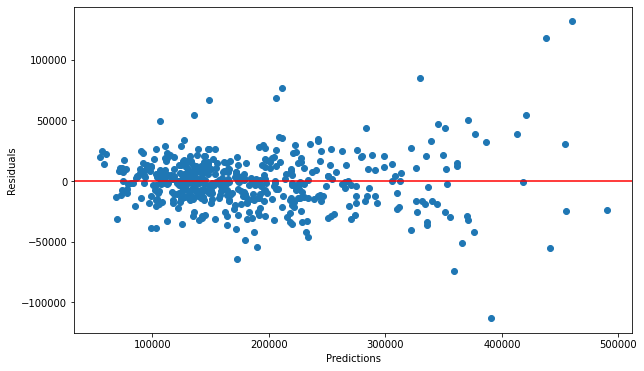

In [149]:
# residual plot
plt.figure(figsize=(10,6))
plt.scatter(prediction,residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals');
plt.axhline(0, color='red');

Predictions are more accurate below 350k. Residuals are further away from 0 after around 350k. 

In [165]:
# create a coef-feature dataframe
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)

In [166]:
coefficients

,0,0
0,Overall Qual,-21525.129738
1,Year Built,8361.732090
2,Year Remod/Add,1899.213999
3,Mas Vnr Area,3336.564550
4,Exter Qual,4007.325468
...,...,...
170,Sale_TypeWD,-857.561388
171,Sale_TypeConLI,-560.983332
172,Sale_TypeConLw,-563.537512
173,Sale_TypeOth,-0.000000


In [171]:
coefficients.columns = ['feature','coef']

In [172]:
coefficients

,feature,coef
0,Overall Qual,-21525.129738
1,Year Built,8361.732090
2,Year Remod/Add,1899.213999
3,Mas Vnr Area,3336.564550
4,Exter Qual,4007.325468
...,...,...
170,Sale_TypeWD,-857.561388
171,Sale_TypeConLI,-560.983332
172,Sale_TypeConLw,-563.537512
173,Sale_TypeOth,-0.000000


In [178]:
coefficients[coefficients['coef']>0].sort_values('coef',ascending=False)

,feature,coef
22,Overall Qual 1st Flr SF,35741.553346
23,Overall Qual Gr Liv Area,35033.491791
7,BsmtFin SF 1,9547.002077
1,Year Built,8361.732090
69,NeighborhoodNridgHt,5189.200244
18,Garage Area,5016.745859
56,NeighborhoodStoneBr,4950.539353
25,Overall Cond Gr Liv Area,4629.664006
6,Bsmt Exposure,4344.243413
30,Full Bath^2,4313.044340


In [180]:
coefficients[coefficients['coef']<0].sort_values('coef')

,feature,coef
0,Overall Qual,-21525.129738
10,1st Flr SF,-18550.567281
12,Full Bath,-3692.682437
44,MS_SubClass120,-3191.631327
99,Roof_MatlWdShake,-3191.142563
45,MS_SubClass160,-3084.038157
101,Roof_MatlCompShg,-3066.331374
102,Roof_MatlTar&Grv,-2565.192457
31,Full Bath Bedroom AbvGr,-2352.217840
94,House_Style2.5Fin,-2001.244679


## Kaggle Submission

In [150]:
# Using Elastic Reg
prediction_submission = lasso.predict(X_test)
prediction_submission.shape

(879,)

In [151]:
housing_test = pd.read_csv("../datasets/test.csv",keep_default_na=False)

In [152]:
submission = pd.DataFrame(
    prediction_submission,
    columns= ["SalePrice"], 
    index = housing_test['Id']
)
submission.head()

,SalePrice
Id,
2658,6.790022e+08
2718,7.238587e+08
2414,6.021556e+08
1989,3.761968e+08
625,7.788969e+08


In [153]:
submission.shape

(879, 1)

In [154]:
# Export to csv
submission.to_csv("../datasets/submission.csv")

## Conclusion and Recommendations

The final model is Lasso with accuracy of 93% and RMSE of 21429 for Validation set. 

Limitation:
The model have poor prediction for Sale price above 350k as seen by the residuals plot. More data is neeeded for higher value sales to improve the accuracy. Ideally, higher value sales should be modeled separately to achieve better prediction. The model is also limited in accuracy for predicting sale prices of houses in Ames. Other region should not use the same model as the demographic, economic landscape, etc may be different which can influence the factors determing the sale price in Ames. In addition, a newer dataset should be used for a more recent price prediction since the prediction ability may decrease due to changes in factors that influence the sale prices.


We found that Overall Qual 1st Flr SF and Overall Qual Gr Liv Area influences the price most. However, as it's hard to make adjustment to area/size, the recommendations below are more feasible.

Recommendation for home buyers:
- For every unit of overall quality compromised, one can expect a price drop of roughly 21525
- For every unit of Overall Qual 1st Flr SF compromised, one can expect a price drop of roughly 35742
- For every unit of Overall Qual Gr Liv Area (Above grade ground living area square feet) compromised, one can expect a price drop of roughly 35034

Recommendation for home sellers to fetch a higher price:

- For every unit increase in Overall Cond Gr Liv Area, one can expect a price increase of roughly 4629
- For every unit increase in Exter Qual, one can expect a price increase of roughly 4007. One can consider a fresh coat of paint to improve the quality of exterior